<font color=#8B4513 size=100 face="標楷體"> 抓資料 </font>

In [1]:
import requests
import json
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math
import statsmodels.api as sm 
import scipy.stats as scs 
from scipy.fftpack import fft,ifft
from bs4 import BeautifulSoup as bs
import re
import datetime, time
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.base.datetools import dates_from_str
import math
from statsmodels.tsa.vector_ar.hypothesis_test_results import \
    CausalityTestResults, NormalityTestResults, WhitenessTestResults
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy as sp

In [2]:
#抓取股票清單
tai50 = "https://www.taifex.com.tw/cht/9/futuresQADetail"
response_tai50 = requests.get(tai50)
soup = bs(response_tai50.text)
stock_list = re.findall(r"[\d][\d][\d][\d][\ ]",soup.text)#抓出股票代碼的形式
stock_list = re.findall(r"[\d][\d][\d][\d]",str(stock_list[::]))
# stock_list = re.findall(r"[\d][\d][\d][\d]",str(stock_list[::2]))#取權重前450

In [3]:
t = datetime.datetime.today()#抓日期
#int(time.mktime(t.timetuple()))yahoo財經的日期為秒,因此轉秒
names = locals()
for etf in stock_list:
    try:
        site = "https://query1.finance.yahoo.com/v7/finance/download/%s.TW?period1=1483228800&period2=%s&interval=1d&events=history"%(etf,int(time.mktime(t.timetuple())))
        response = requests.get(site)
        names["df_%s"%etf] = pd.read_csv(StringIO(response.text))
        names["df_%s"%etf] = names["df_%s"%etf].fillna(method='ffill')
        names["df_%s"%etf]["價格漲幅"]=names["df_%s"%etf]["Adj Close"].diff()
        names["df_%s"%etf]["成交量變動"]=names["df_%s"%etf]["Volume"].diff()
        names["df_%s"%etf] = names["df_%s"%etf].dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)    
        names["df_%s"%etf] = names["df_%s"%etf].rename(columns={
 'Open':'Open_%s'% etf,
 'High':'High_%s'% etf,
 'Low':'Low_%s'% etf,
 'Close':'Close_%s'% etf,
 'Adj Close':'Adj Close_%s'% etf,
 'Volume':'Volume_%s'% etf,
 '價格漲幅':'價格漲幅_%s'% etf,
 '漲幅...':'漲幅..._%s'% etf,
 '振幅...':'振幅..._%s'% etf,
 '成交量變動':'成交量變動_%s'% etf,})
    except:
        print(names["df_%s"%etf],"抓不到")
        pass

In [4]:
#建立df清單
stock_df_list=[]
for stock in stock_list:
    stock_df ="df_"+stock
    stock_df_list.append(stock_df)

In [5]:
#合併成一個df
all_stock_df=df_2330.iloc[:,[0]]
for stock_df in stock_df_list:
    all_stock_df = pd.merge(all_stock_df, names[stock_df], how='left', on='Date')

In [6]:

# FITX_close = pd.read_csv(r"C:\Users\user\Desktop\class\金融\台指近.csv")
# FITX_close = FITX_close.rename(columns={"時間":"Date"}).iloc[0:,[0,4]]
# FITX_close["Date"] = pd.to_datetime(FITX_close["Date"])  #日期格式化
# FITX_close["Date"] = FITX_close["Date"].astype(str)  #merge的那個形態要一樣
# FITX_close["Target"] = FITX_close["收盤價"].shift(-1)
# FITX_close = FITX.iloc[:,[0,4,FITX.shape[1]-1]]
# Significant_factor = pd.merge(all_stock_df, FITX_close, how='left', on='Date')


<font color=#8B4513 size=100 face="標楷體"> 資料預處理 </font>

In [7]:
#向量自回歸抓領先變數
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.base.datetools import dates_from_str
import math
from statsmodels.tsa.vector_ar.hypothesis_test_results import \
    CausalityTestResults, NormalityTestResults, WhitenessTestResults
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy as sp

In [8]:
# #先把shift的收盤價帶入當成train
# FITX = pd.read_csv(r"C:\Users\user\Desktop\class\金融\台指近.csv")
# FITX = FITX.rename(columns={"時間":"Date"}).iloc[0:,[0,4]]
# FITX["Date"] = pd.to_datetime(FITX["Date"])  #日期格式化
# FITX["Date"] = FITX["Date"].astype(str)  #merge的那個形態要一樣
# all_stock_df["Date"] = all_stock_df["Date"].astype(str)
# all_stock_df_FITX = all_stock_df
# all_stock_df_FITX = pd.merge(all_stock_df_FITX, FITX.iloc[:,[0,19]], how='left', on='Date')
# print("目前資料共",df_2330.shape[0],"根日K")
print("目前資料共",df_2330.shape[0],"根日K")

目前資料共 854 根日K


In [9]:

#逐一併入再找出有領先因子
#統計區間終點=日前日K-1
間隔 = 300
統計區間終點 =500
統計區間起點 = 統計區間終點-間隔   #樣本內
Significant_factor = df_2330.iloc[0:,[0]]
FITX_close = pd.read_csv(r"C:\Users\user\Desktop\class\金融\台指近.csv")
FITX_close = FITX_close.rename(columns={"時間":"Date"}).iloc[0:,[0,4]]
FITX_close["Date"] = pd.to_datetime(FITX_close["Date"])  #日期格式化
FITX_close["Date"] = FITX_close["Date"].astype(str)  #merge的那個形態要一樣
for i in stock_df_list:
    try:
        names['%s' % i]["Date"] = names['%s' % i]["Date"].astype(str)
        append_FITX = pd.merge(names['%s' % i], FITX_close, how='left', on='Date')
        model = VAR(append_FITX.iloc[統計區間起點:統計區間終點,1:append_FITX.shape[1]])  #用樣本內跑檢定,避免選擇性偏誤
        results = model.fit(1)
        for a in range(1,append_FITX.shape[1]-1):
            p_value = results.test_causality("收盤價",causing=append_FITX.iloc[:,[a]], kind='f', signif=0.1).pvalue
            if p_value<.07:
                Significant_factor = pd.merge(Significant_factor, append_FITX.iloc[:,[0,a]], how='left', on='Date')
    except:
        pass
Significant_factor = Significant_factor.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

# 共線性,去除vif>100的
cc = sp.corrcoef(Significant_factor.iloc[:,1:Significant_factor.shape[1]], rowvar=False)
VIF = np.linalg.inv(cc)
VIF_list=VIF.diagonal()
VIF_100 = np.where(VIF_list>100)    #找VIF>100的列
VIF_100 = VIF_100[0][1:]            #留日期
Significant_factor.drop(Significant_factor.iloc[:,1:Significant_factor.shape[1]].columns[VIF_100], axis=1,inplace=True)
Significant_factor.shape


print("顯著的因子有",Significant_factor.shape[1],"個")      

顯著的因子有 169 個


<font color=#8B4513 size=100 face="標楷體"> 建模ML </font>

In [10]:
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, auc
import pandas as pd
import numpy as np
from sklearn.svm import SVC,SVR
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import NuSVR
from sklearn.tree import DecisionTreeRegressor
import sqlite3
from xgboost.sklearn import XGBRegressor
from xgboost import plot_tree
from graphviz import Digraph
import matplotlib.pyplot as plt

In [33]:
Significant_factor_test = Significant_factor
預測=[]
實際 =[]
格 = 13
for 起 in range(500,len(Significant_factor_test)-格):
    終 = 起+格

    model_xgb = xgb.XGBRegressor(
    max_depth=15,
    subsample = 0.1  
    )
    
     
    #合併
    FITX = pd.read_csv(r"C:\Users\user\Desktop\class\金融\台指近.csv")
    FITX = FITX.rename(columns={"時間":"Date"})
    FITX["Date"] = pd.to_datetime(FITX["Date"])  #日期格式化
    FITX["Date"] = FITX["Date"].astype(str)  #merge的那個形態要一樣
    FITX["(期權)未平倉"] = FITX["(期權)未平倉"].str.replace("口","")
    FITX["(期權)未平倉"] = FITX["(期權)未平倉"].astype(float)
    FITX["(期權)未平倉變化"] = FITX["(期權)未平倉變化"].str.replace("口","")
    FITX["(期權)未平倉變化"] = FITX["(期權)未平倉變化"].astype(float)
    FITX["diff收盤價"] = FITX["收盤價"].diff()
    FITX["Target"] = FITX["收盤價"].shift(-1)
    FITX_target = FITX.iloc[:,[0,FITX.shape[1]-1]]
    Significant_factor_test =  pd.merge(Significant_factor, FITX_target, how='left', on='Date')
    Significant_factor_test = Significant_factor_test.set_index('Date')
    #拆分訓練測試

    安安=0

    all_feature= Significant_factor_test
#     .dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    train_data = all_feature.iloc[起:終,1:all_feature.shape[1]-1]
    train_targets = all_feature.iloc[起:終,[all_feature.shape[1]-1]]
    test_data = all_feature.iloc[終:終+1,1:all_feature.shape[1]-1]
    test_targets = all_feature.iloc[終:終+1,all_feature.shape[1]-1]



    # train_data, test_data, train_targets, test_targets = train_test_split(all_feature.iloc[:,0:all_feature.shape[1]-2], all_feature.iloc[:,all_feature.shape[1]-1] , test_size=0.1,shuffle=False)


    #訓練
    model_xgb.fit(train_data, train_targets)
    y_pred = model_xgb.predict(test_data)

    預測.append(y_pred[0])
    實際.append(test_targets[0])


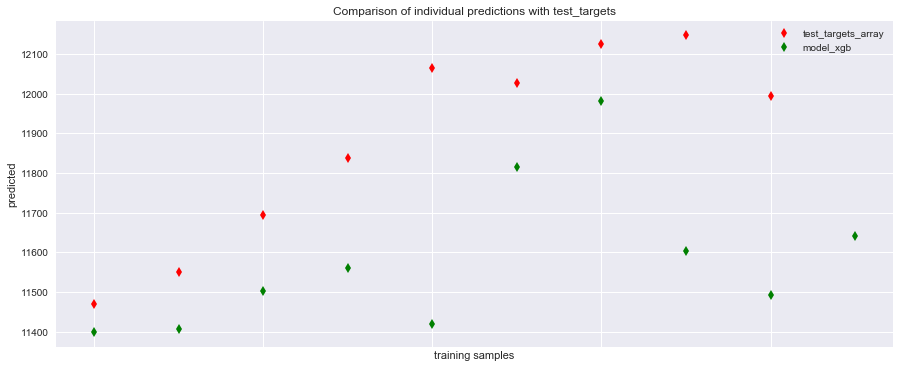

In [34]:

#視覺化,紅色為標準答案
plt.style.use('seaborn')
test_targets_array=test_targets.values
plt.figure(figsize=(15, 6)) 
xt = test_data[:]
plt.plot(實際[-10:], 'rd', label='test_targets_array')
plt.plot(預測[-10:], 'gd', label='model_xgb')
# plt.plot(model_AdaBoostRegressor.predict(xt), '#00008B', label='model_AdaBoostRegressor')
# plt.plot(Vote.predict(xt), 'bd', label='Vote')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with test_targets')
plt.show()

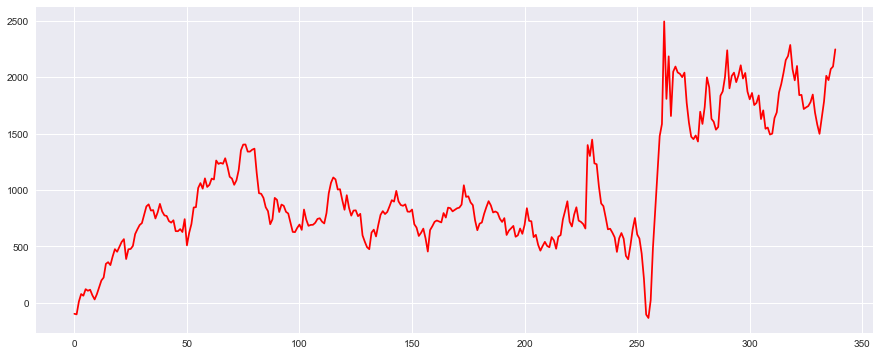

In [35]:
#簡易回測,方法1  視預測值漲跌決定買賣
all_profit = 0
profit = 0
獲利圖 =[]
for i in range(1,len(預測)):
    if (預測[i]+預測[i-1])/2+0>(預測[i]+預測[i-1]+預測[i-2]+預測[i-3])/4:   
        profit = 實際[i]-實際[i-1]
        all_profit+=profit
        獲利圖.append(all_profit)
    else:
        
        profit = 實際[i-1]-實際[i]
        all_profit+=profit
        獲利圖.append(all_profit)
獲利圖array=np.array(獲利圖)
plt.style.use('seaborn')
plt.figure(figsize=(15, 6)) 
plt.plot(獲利圖array, 'r', label='test_targets_array')
plt.show()




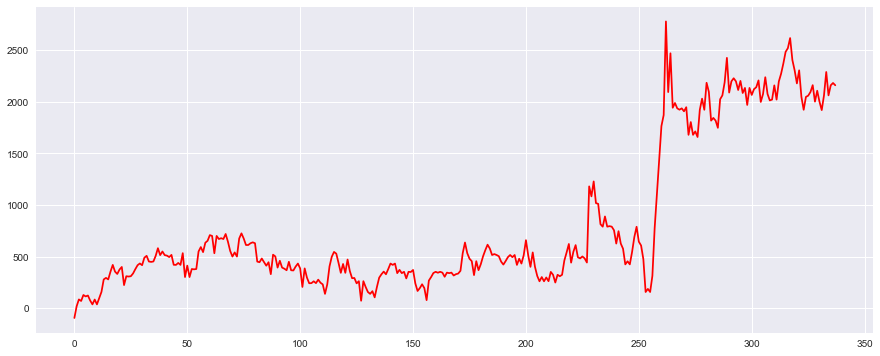

In [36]:
#簡易回測,方法2  
all_profit = 0
profit = 0
獲利圖 =[]
for i in range(1,len(預測)-2):
    if 預測[i]>(預測[i-2]):   
        profit = 實際[i+1]-實際[i]
        all_profit+=profit
        獲利圖.append(all_profit)
    else:
        pass
        profit = 實際[i-1]-實際[i]
        all_profit+=profit
        獲利圖.append(all_profit)
獲利圖array=np.array(獲利圖)
plt.style.use('seaborn')
plt.figure(figsize=(15, 6)) 
plt.plot(獲利圖array, 'r', label='test_targets_array')
plt.show()
    

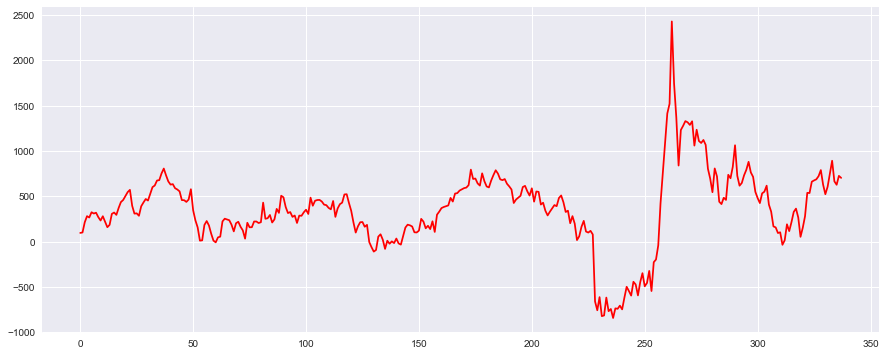

明天的預測是
上漲


In [37]:
#簡易回測,方法3  
all_profit = 0
profit = 0
獲利圖 =[]
for i in range(1,len(預測)-2):
    if 預測[i]+20>(預測[i-1]):   
        profit = 實際[i]-實際[i-1]
        all_profit+=profit
        獲利圖.append(all_profit)
    else:
        pass
        profit = 實際[i-1]-實際[i]
        all_profit+=profit
        獲利圖.append(all_profit)
獲利圖array=np.array(獲利圖)
plt.style.use('seaborn')
plt.figure(figsize=(15, 6)) 
plt.plot(獲利圖array, 'r', label='test_targets_array')
plt.show()
   
print("明天的預測是")
if 預測[-1]>預測[-2]:
    print("上漲")
else:
    print("下跌")    

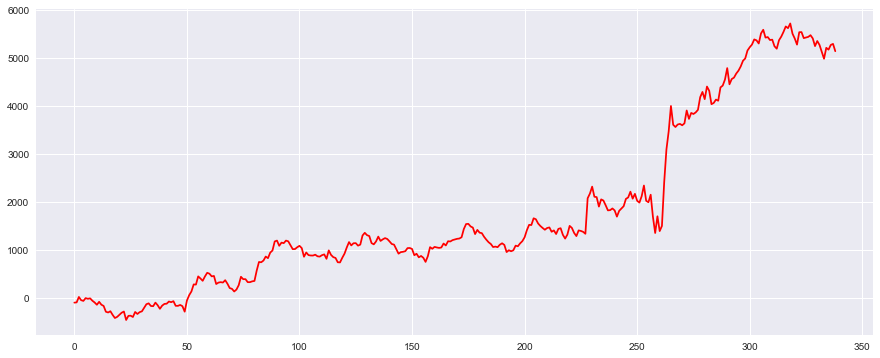

In [38]:
#簡易回測,方法4
all_profit = 0
profit = 0
獲利圖 =[]
for i in range(1,len(預測)):
    if 預測[i]+10<實際[i-2]:
        profit = 實際[i]-實際[i-1]
        all_profit+=profit
        獲利圖.append(all_profit)
    else:
        profit = 實際[i-1]-實際[i]
        all_profit+=profit
        獲利圖.append(all_profit)
獲利圖array=np.array(獲利圖)
plt.style.use('seaborn')
plt.figure(figsize=(15, 6)) 
plt.plot(獲利圖array, 'r', label='test_targets_array')
plt.show()
    

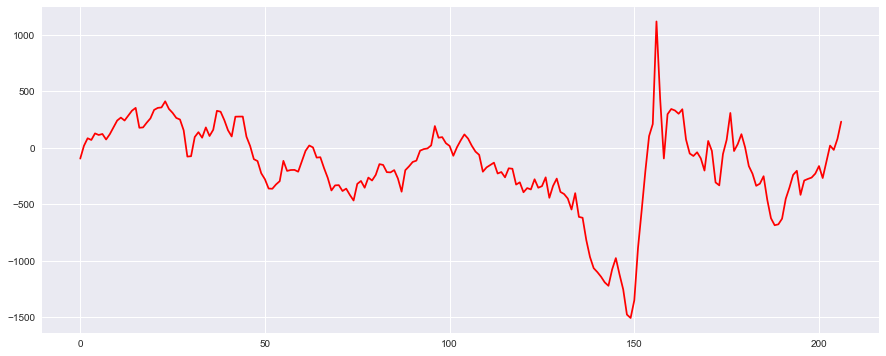

In [39]:
#雙重條件
all_profit = 0
profit = 0
獲利圖 =[]
for i in range(1,len(預測)):
    if ((預測[i]+預測[i-1])/2>(預測[i]+預測[i-1]+預測[i-2]+預測[i-3])/4)&(預測[i]>預測[i-1]):   
        profit = 實際[i]-實際[i-1]
        all_profit+=profit
        獲利圖.append(all_profit)
    elif ((預測[i]+預測[i-1])/2<(預測[i]+預測[i-1]+預測[i-2]+預測[i-3])/4)&(預測[i]<預測[i-1]): 
        
        profit = 實際[i-1]-實際[i]
        all_profit+=profit
        獲利圖.append(all_profit)
    else:
        pass
獲利圖array=np.array(獲利圖)
plt.style.use('seaborn')
plt.figure(figsize=(15, 6)) 
plt.plot(獲利圖array, 'r', label='test_targets_array')
plt.show()



In [43]:
#預測結果1
print("明天的預測是")
if (預測[-1]+預測[-2])/2>(預測[-1]+預測[-2]+預測[-3]+預測[-4])/4:
    print("上漲")
else:
    print("下跌")

明天的預測是
下跌


In [41]:
#預測結果3
print("明天的預測是")
if 預測[-1]>預測[-2]:
    print("上漲")
else:
    print("下跌")

明天的預測是
上漲


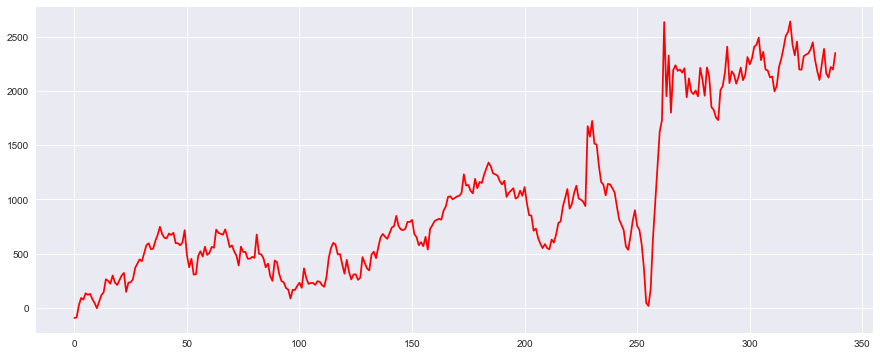

In [42]:
all_profit = 0
profit = 0
獲利圖 =[]
for i in range(1,len(預測)):
    if 預測[i]>預測[i-2]:   
        profit = 實際[i]-實際[i-1]
        all_profit+=profit
        獲利圖.append(all_profit)
    else:
        profit = 實際[i-1]-實際[i]
        all_profit+=profit
        獲利圖.append(all_profit)
獲利圖array=np.array(獲利圖)
plt.style.use('seaborn')
plt.figure(figsize=(15, 6)) 
plt.plot(獲利圖array, 'r', label='test_targets_array')
plt.show()
    

In [33]:
#預測結果
predict =model_xgb.predict(下單預測)
print("明天的預測是")
if predict[len(predict)-1]>=predict[len(predict)-3]: 
    print("上漲")
else:
    print("下跌")

NameError: name '下單預測' is not defined

In [162]:
#簡易回測,方法1  視預測值漲跌決定買賣
predict = Vote.predict(test_data)
all_profit = 0
profit = 0
for i in range(1,len(predict)):
    if predict[i]>=predict[i-1]:   
        profit = test_targets_array[i]-test_targets_array[i-1]
        all_profit+=profit
    else:
        profit = test_targets_array[i-1]-test_targets_array[i]
        all_profit+=profit
    print("第", i,"天積獲利",profit,"第", i,"天累積獲利",all_profit)
    

第 1 天積獲利 -277.0 第 1 天累積獲利 -277.0
第 2 天積獲利 38.0 第 2 天累積獲利 -239.0
第 3 天積獲利 -126.0 第 3 天累積獲利 -365.0
第 4 天積獲利 238.0 第 4 天累積獲利 -127.0
第 5 天積獲利 -337.0 第 5 天累積獲利 -464.0
第 6 天積獲利 -109.0 第 6 天累積獲利 -573.0
第 7 天積獲利 30.0 第 7 天累積獲利 -543.0
第 8 天積獲利 -84.0 第 8 天累積獲利 -627.0
第 9 天積獲利 61.0 第 9 天累積獲利 -566.0
第 10 天積獲利 -88.0 第 10 天累積獲利 -654.0
第 11 天積獲利 117.0 第 11 天累積獲利 -537.0
第 12 天積獲利 -49.0 第 12 天累積獲利 -586.0
第 13 天積獲利 -165.0 第 13 天累積獲利 -751.0
第 14 天積獲利 -68.0 第 14 天累積獲利 -819.0
第 15 天積獲利 56.0 第 15 天累積獲利 -763.0
第 16 天積獲利 107.0 第 16 天累積獲利 -656.0
第 17 天積獲利 19.0 第 17 天累積獲利 -637.0
第 18 天積獲利 -66.0 第 18 天累積獲利 -703.0
第 19 天積獲利 -209.0 第 19 天累積獲利 -912.0
第 20 天積獲利 77.0 第 20 天累積獲利 -835.0
第 21 天積獲利 163.0 第 21 天累積獲利 -672.0
第 22 天積獲利 11.0 第 22 天累積獲利 -661.0
第 23 天積獲利 -62.0 第 23 天累積獲利 -723.0
第 24 天積獲利 8.0 第 24 天累積獲利 -715.0
第 25 天積獲利 -138.0 第 25 天累積獲利 -853.0
第 26 天積獲利 50.0 第 26 天累積獲利 -803.0
第 27 天積獲利 -176.0 第 27 天累積獲利 -979.0
第 28 天積獲利 -75.0 第 28 天累積獲利 -1054.0
第 29 天積獲利 99.0 第 29 天累積獲利 -955.0
第 30 天積獲利 113.0 第 30 天累積獲利 -842.0


IndexError: index 38 is out of bounds for axis 0 with size 38

<font color=#8B4513 size=100 face="標楷體"> 建模DL </font>

In [265]:

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline

In [266]:
all_feature= Significant_factor_test
all_feature = all_feature.drop(columns=["Date"])
all_feature

,Low_2884,Volume_6415,價格漲幅_6415,成交量變動_6415,Volume_2890,價格漲幅_2890,價格漲幅_2105,價格漲幅_2633,價格漲幅_2823,價格漲幅_2324,...,價格漲幅_1714,Volume_2480,價格漲幅_2480,成交量變動_2480,成交量變動_1321,Volume_1519,價格漲幅_1519,成交量變動_1519,價格漲幅_3530,Target
0,14.857800,626000.0,17.530304,423000.0,6583345.0,-0.022478,0.267430,-0.046169,0.000000,0.000000,...,0.000000,329000.0,0.371946,268000.0,45000.0,176000.0,0.092657,-22000.0,-1.436646,9342.0
1,14.898300,171000.0,5.843475,-455000.0,12639896.0,0.067425,0.000000,0.369341,0.081284,0.126235,...,-0.027159,148000.0,-0.041328,-181000.0,-81000.0,351000.0,0.046328,175000.0,-0.383110,9365.0
2,14.898300,506000.0,1.947784,335000.0,10379642.0,0.029969,0.802292,0.184668,-0.446740,-0.042077,...,0.000000,243000.0,0.000000,95000.0,42000.0,731000.0,0.138985,380000.0,-0.095772,9342.0
3,14.776900,200000.0,-11.199920,-306000.0,8408650.0,-0.029969,0.534858,-0.138502,0.203072,-0.084158,...,0.054326,211000.0,-0.041327,-32000.0,-43000.0,302000.0,-0.092657,-429000.0,2.873291,9341.0
4,14.736400,78000.0,-1.460846,-122000.0,8668352.0,-0.029967,-0.802291,0.046165,0.040596,0.042079,...,-0.027167,189000.0,0.000000,-22000.0,12000.0,220000.0,-0.092656,-82000.0,-0.469299,9337.0
5,14.776900,155000.0,6.817352,77000.0,9286992.0,0.044956,1.337154,-0.046165,-0.121881,-0.042079,...,0.036219,313000.0,0.041327,124000.0,-30000.0,795000.0,0.000000,575000.0,5.669960,9411.0
6,14.857800,153000.0,-2.921722,-2000.0,14103096.0,0.022470,0.000000,0.046165,-0.527930,-0.126237,...,0.190144,146000.0,0.000000,-167000.0,16000.0,574000.0,0.000000,-221000.0,-3.754433,9375.0
7,14.857800,156000.0,-8.765168,3000.0,8483605.0,-0.014980,-0.178291,0.046169,-0.731096,0.210395,...,0.000000,341000.0,0.082655,195000.0,15000.0,172000.0,-0.092657,-402000.0,0.000000,9285.0
8,14.817400,194000.0,-5.843444,38000.0,8759142.0,0.000000,-0.534859,0.000000,-0.284264,0.210395,...,-0.280689,118000.0,-0.082655,-223000.0,-27000.0,228000.0,-0.185310,56000.0,-0.469314,9340.0
9,14.857800,81000.0,6.330413,-113000.0,6391207.0,0.007490,0.267429,-0.046169,0.121787,0.000000,...,0.027167,148000.0,-0.165307,30000.0,21000.0,271000.0,0.046328,43000.0,0.938614,9340.0


In [267]:
def buildTrain(train, pastDay=30, futureDay=5):
    X_train, Y_train = [], []
    for i in range(train.shape[0]-futureDay-pastDay):
        X_train.append(np.array(train.iloc[i:i+pastDay]))
        Y_train.append(np.array(train.iloc[i+pastDay:i+pastDay+futureDay]["Target"]))
    return np.array(X_train), np.array(Y_train)

In [268]:
def splitData(X,Y,rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

In [269]:


# build Data, use last 30 days to predict next 5 days
X_train, Y_train = buildTrain(all_feature, 30, 5)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)
# X_trian: (5710, 30, 10)
# Y_train: (5710, 5, 1)
# X_val: (634, 30, 10)
# Y_val: (634, 5, 1)
print("X_train",X_train.shape)
print("Y_train",Y_train.shape)
print("X_val",X_val.shape)
print("Y_val",Y_val.shape)

NameError: name 'shuffle' is not defined

In [270]:
def buildOneToOneModel(shape):
    model = Sequential()
    model.add(LSTM(250, input_length=shape[1], input_dim=shape[2],return_sequences=True))
    model.add(LSTM(100,return_sequences=True))
    # output shape: (1, 1)
    model.add(TimeDistributed(Dense(1)))    # or use model.add(Dense(1))
    model.compile(loss="mae", optimizer="adam")
    model.summary()
    return model

In [271]:
Y_train.shape

(800, 5)

In [277]:
# change the last day and next day 
X_train, Y_train = buildTrain(all_feature, 1, 1)
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

# from 2 dimmension to 3 dimension
Y_train = Y_train[:,np.newaxis]
Y_val = Y_val[:,np.newaxis]

model = Sequential()
model.add(LSTM(250, input_length=X_train .shape[1], input_dim=X_train .shape[2],return_sequences=True))
model.add(LSTM(100,return_sequences=True))
# output shape: (1, 1)
model.add(TimeDistributed(Dense(1)))    # or use model.add(Dense(1))
model.compile(loss="mae", optimizer="adam")
model.summary()

history = model.fit(X_train, Y_train, epochs=10000, batch_size=128, validation_data=(X_val, Y_val))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 250)            352000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 100)            140400    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 1, 1)              101       
Total params: 492,501
Trainable params: 492,501
Non-trainable params: 0
_________________________________________________________________
Train on 750 samples, validate on 83 samples
Epoch 1/10000
750/750 [==============================] - 1s 1ms/step - loss: 10663.0970 - val_loss: 9716.2041
Epoch 2/10000
750/750 [==============================] - 0s 113us/step - loss: 10662.4953 - val_loss: 9715.4033
Epoch 3/10000
750/750 [==============================] - 0s 112us/step - loss: 10661.7781 - val_loss: 9714.4453

750/750 [==============================] - 0s 120us/step - loss: 10582.0126 - val_loss: 9635.2285
Epoch 139/10000
750/750 [==============================] - 0s 127us/step - loss: 10581.5299 - val_loss: 9634.7451
Epoch 140/10000
750/750 [==============================] - 0s 154us/step - loss: 10581.0475 - val_loss: 9634.2646
Epoch 141/10000
750/750 [==============================] - 0s 130us/step - loss: 10580.5652 - val_loss: 9633.7832
Epoch 142/10000
750/750 [==============================] - 0s 144us/step - loss: 10580.0833 - val_loss: 9633.3018
Epoch 143/10000
750/750 [==============================] - 0s 133us/step - loss: 10579.6015 - val_loss: 9632.8203
Epoch 144/10000
750/750 [==============================] - 0s 132us/step - loss: 10579.1199 - val_loss: 9632.3408
Epoch 145/10000
750/750 [==============================] - 0s 137us/step - loss: 10578.6389 - val_loss: 9631.8594
Epoch 146/10000
750/750 [==============================] - 0s 129us/step - loss: 10578.1572 - val_loss: 

750/750 [==============================] - 0s 130us/step - loss: 10547.6643 - val_loss: 9600.9170
Epoch 211/10000
750/750 [==============================] - 0s 138us/step - loss: 10547.1916 - val_loss: 9600.4443
Epoch 212/10000
750/750 [==============================] - 0s 134us/step - loss: 10546.7186 - val_loss: 9599.9717
Epoch 213/10000
750/750 [==============================] - 0s 117us/step - loss: 10546.2460 - val_loss: 9599.5000
Epoch 214/10000
750/750 [==============================] - 0s 126us/step - loss: 10545.7736 - val_loss: 9599.0283
Epoch 215/10000
750/750 [==============================] - 0s 129us/step - loss: 10545.3010 - val_loss: 9598.5547
Epoch 216/10000
750/750 [==============================] - 0s 118us/step - loss: 10544.8284 - val_loss: 9598.0830
Epoch 217/10000
750/750 [==============================] - 0s 134us/step - loss: 10544.3565 - val_loss: 9597.6104
Epoch 218/10000
750/750 [==============================] - 0s 146us/step - loss: 10543.8840 - val_loss: 

750/750 [==============================] - 0s 131us/step - loss: 10513.7860 - val_loss: 9567.0547
Epoch 283/10000
750/750 [==============================] - 0s 145us/step - loss: 10513.3175 - val_loss: 9566.5859
Epoch 284/10000
750/750 [==============================] - 0s 169us/step - loss: 10512.8490 - val_loss: 9566.1172
Epoch 285/10000
750/750 [==============================] - 0s 137us/step - loss: 10512.3800 - val_loss: 9565.6494
Epoch 286/10000
750/750 [==============================] - 0s 141us/step - loss: 10511.9118 - val_loss: 9565.1807
Epoch 287/10000
750/750 [==============================] - 0s 128us/step - loss: 10511.4434 - val_loss: 9564.7119
Epoch 288/10000
750/750 [==============================] - 0s 137us/step - loss: 10510.9749 - val_loss: 9564.2441
Epoch 289/10000
750/750 [==============================] - 0s 146us/step - loss: 10510.5059 - val_loss: 9563.7764
Epoch 290/10000
750/750 [==============================] - 0s 148us/step - loss: 10510.0379 - val_loss: 

750/750 [==============================] - 0s 114us/step - loss: 10480.1320 - val_loss: 9533.4082
Epoch 355/10000
750/750 [==============================] - 0s 122us/step - loss: 10479.6655 - val_loss: 9532.9424
Epoch 356/10000
750/750 [==============================] - 0s 147us/step - loss: 10479.1995 - val_loss: 9532.4766
Epoch 357/10000
750/750 [==============================] - 0s 133us/step - loss: 10478.7334 - val_loss: 9532.0098
Epoch 358/10000
750/750 [==============================] - 0s 144us/step - loss: 10478.2669 - val_loss: 9531.5430
Epoch 359/10000
750/750 [==============================] - 0s 138us/step - loss: 10477.8005 - val_loss: 9531.0781
Epoch 360/10000
750/750 [==============================] - 0s 136us/step - loss: 10477.3340 - val_loss: 9530.6104
Epoch 361/10000
750/750 [==============================] - 0s 125us/step - loss: 10476.8679 - val_loss: 9530.1465
Epoch 362/10000
750/750 [==============================] - 0s 112us/step - loss: 10476.4019 - val_loss: 

750/750 [==============================] - 0s 120us/step - loss: 10446.6024 - val_loss: 9499.8828
Epoch 427/10000
750/750 [==============================] - 0s 121us/step - loss: 10446.1370 - val_loss: 9499.4180
Epoch 428/10000
750/750 [==============================] - 0s 125us/step - loss: 10445.6716 - val_loss: 9498.9541
Epoch 429/10000
750/750 [==============================] - 0s 112us/step - loss: 10445.2067 - val_loss: 9498.4883
Epoch 430/10000
750/750 [==============================] - 0s 118us/step - loss: 10444.7419 - val_loss: 9498.0234
Epoch 431/10000
750/750 [==============================] - 0s 100us/step - loss: 10444.2766 - val_loss: 9497.5576
Epoch 432/10000
750/750 [==============================] - 0s 100us/step - loss: 10443.8114 - val_loss: 9497.0938
Epoch 433/10000
750/750 [==============================] - 0s 92us/step - loss: 10443.3464 - val_loss: 9496.6270
Epoch 434/10000
750/750 [==============================] - 0s 107us/step - loss: 10442.8816 - val_loss: 9

750/750 [==============================] - 0s 134us/step - loss: 10379.7323 - val_loss: 9433.0186
Epoch 571/10000
750/750 [==============================] - 0s 140us/step - loss: 10379.2678 - val_loss: 9432.5527
Epoch 572/10000
750/750 [==============================] - 0s 129us/step - loss: 10378.8037 - val_loss: 9432.0908
Epoch 573/10000
750/750 [==============================] - 0s 125us/step - loss: 10378.3408 - val_loss: 9431.6270
Epoch 574/10000
750/750 [==============================] - 0s 140us/step - loss: 10377.8764 - val_loss: 9431.1621
Epoch 575/10000
750/750 [==============================] - 0s 123us/step - loss: 10377.4124 - val_loss: 9430.6992
Epoch 576/10000
750/750 [==============================] - 0s 136us/step - loss: 10376.9490 - val_loss: 9430.2354
Epoch 577/10000
750/750 [==============================] - 0s 126us/step - loss: 10376.4852 - val_loss: 9429.7715
Epoch 578/10000
750/750 [==============================] - 0s 122us/step - loss: 10376.0211 - val_loss: 

Epoch 642/10000
750/750 [==============================] - 0s 108us/step - loss: 10346.3466 - val_loss: 9399.6338
Epoch 643/10000
750/750 [==============================] - 0s 104us/step - loss: 10345.8837 - val_loss: 9399.1719
Epoch 644/10000
750/750 [==============================] - 0s 100us/step - loss: 10345.4200 - val_loss: 9398.7061
Epoch 645/10000
750/750 [==============================] - 0s 110us/step - loss: 10344.9560 - val_loss: 9398.2432
Epoch 646/10000
750/750 [==============================] - 0s 137us/step - loss: 10344.4929 - val_loss: 9397.7812
Epoch 647/10000
750/750 [==============================] - 0s 138us/step - loss: 10344.0293 - val_loss: 9397.3164
Epoch 648/10000
750/750 [==============================] - 0s 109us/step - loss: 10343.5653 - val_loss: 9396.8525
Epoch 649/10000
750/750 [==============================] - 0s 117us/step - loss: 10343.1022 - val_loss: 9396.3896
Epoch 650/10000
750/750 [==============================] - 0s 125us/step - loss: 10342.6

Epoch 714/10000
750/750 [==============================] - 0s 121us/step - loss: 10312.9806 - val_loss: 9366.2676
Epoch 715/10000
750/750 [==============================] - 0s 124us/step - loss: 10312.5165 - val_loss: 9365.8047
Epoch 716/10000
750/750 [==============================] - 0s 125us/step - loss: 10312.0540 - val_loss: 9365.3418
Epoch 717/10000
750/750 [==============================] - 0s 120us/step - loss: 10311.5907 - val_loss: 9364.8779
Epoch 718/10000
750/750 [==============================] - 0s 122us/step - loss: 10311.1263 - val_loss: 9364.4150
Epoch 719/10000
750/750 [==============================] - 0s 121us/step - loss: 10310.6639 - val_loss: 9363.9512
Epoch 720/10000
750/750 [==============================] - 0s 112us/step - loss: 10310.2003 - val_loss: 9363.4873
Epoch 721/10000
750/750 [==============================] - 0s 106us/step - loss: 10309.7366 - val_loss: 9363.0244
Epoch 722/10000
750/750 [==============================] - 0s 118us/step - loss: 10309.2

750/750 [==============================] - 0s 86us/step - loss: 10246.7423 - val_loss: 9300.0303
Epoch 858/10000
750/750 [==============================] - 0s 85us/step - loss: 10246.2783 - val_loss: 9299.5684
Epoch 859/10000
750/750 [==============================] - 0s 84us/step - loss: 10245.8154 - val_loss: 9299.1045
Epoch 860/10000
750/750 [==============================] - 0s 88us/step - loss: 10245.3527 - val_loss: 9298.6406
Epoch 861/10000
750/750 [==============================] - 0s 81us/step - loss: 10244.8890 - val_loss: 9298.1777
Epoch 862/10000
750/750 [==============================] - 0s 82us/step - loss: 10244.4268 - val_loss: 9297.7158
Epoch 863/10000
750/750 [==============================] - 0s 84us/step - loss: 10243.9634 - val_loss: 9297.2520
Epoch 864/10000
750/750 [==============================] - 0s 85us/step - loss: 10243.4996 - val_loss: 9296.7881
Epoch 865/10000
750/750 [==============================] - 0s 85us/step - loss: 10243.0375 - val_loss: 9296.3262

Epoch 1001/10000
750/750 [==============================] - 0s 112us/step - loss: 10180.0552 - val_loss: 9233.3438
Epoch 1002/10000
750/750 [==============================] - 0s 113us/step - loss: 10179.5922 - val_loss: 9232.8809
Epoch 1003/10000
750/750 [==============================] - 0s 112us/step - loss: 10179.1299 - val_loss: 9232.4189
Epoch 1004/10000
750/750 [==============================] - 0s 110us/step - loss: 10178.6658 - val_loss: 9231.9561
Epoch 1005/10000
750/750 [==============================] - 0s 115us/step - loss: 10178.2034 - val_loss: 9231.4922
Epoch 1006/10000
750/750 [==============================] - 0s 104us/step - loss: 10177.7413 - val_loss: 9231.0293
Epoch 1007/10000
750/750 [==============================] - 0s 110us/step - loss: 10177.2770 - val_loss: 9230.5674
Epoch 1008/10000
750/750 [==============================] - 0s 110us/step - loss: 10176.8149 - val_loss: 9230.1045
Epoch 1009/10000
750/750 [==============================] - 0s 124us/step - loss

750/750 [==============================] - 0s 117us/step - loss: 10114.3195 - val_loss: 9167.6074
Epoch 1144/10000
750/750 [==============================] - 0s 114us/step - loss: 10113.8556 - val_loss: 9167.1455
Epoch 1145/10000
750/750 [==============================] - 0s 116us/step - loss: 10113.3941 - val_loss: 9166.6826
Epoch 1146/10000
750/750 [==============================] - 0s 112us/step - loss: 10112.9300 - val_loss: 9166.2188
Epoch 1147/10000
750/750 [==============================] - 0s 109us/step - loss: 10112.4675 - val_loss: 9165.7559
Epoch 1148/10000
750/750 [==============================] - 0s 113us/step - loss: 10112.0051 - val_loss: 9165.2939
Epoch 1149/10000
750/750 [==============================] - 0s 113us/step - loss: 10111.5410 - val_loss: 9164.8320
Epoch 1150/10000
750/750 [==============================] - 0s 113us/step - loss: 10111.0789 - val_loss: 9164.3682
Epoch 1151/10000
750/750 [==============================] - 0s 112us/step - loss: 10110.6165 - va

Epoch 1286/10000
750/750 [==============================] - 0s 82us/step - loss: 10048.1196 - val_loss: 9101.4092
Epoch 1287/10000
750/750 [==============================] - 0s 82us/step - loss: 10047.6572 - val_loss: 9100.9473
Epoch 1288/10000
750/750 [==============================] - 0s 84us/step - loss: 10047.1938 - val_loss: 9100.4824
Epoch 1289/10000
750/750 [==============================] - 0s 85us/step - loss: 10046.7301 - val_loss: 9100.0205
Epoch 1290/10000
750/750 [==============================] - 0s 85us/step - loss: 10046.2683 - val_loss: 9099.5576
Epoch 1291/10000
750/750 [==============================] - 0s 84us/step - loss: 10045.8043 - val_loss: 9099.0938
Epoch 1292/10000
750/750 [==============================] - 0s 85us/step - loss: 10045.3412 - val_loss: 9098.6299
Epoch 1293/10000
750/750 [==============================] - 0s 81us/step - loss: 10044.8793 - val_loss: 9098.1680
Epoch 1294/10000
750/750 [==============================] - 0s 85us/step - loss: 10044.4

Epoch 1358/10000
750/750 [==============================] - 0s 104us/step - loss: 10014.7745 - val_loss: 9068.0654
Epoch 1359/10000
750/750 [==============================] - 0s 92us/step - loss: 10014.3114 - val_loss: 9067.6025
Epoch 1360/10000
750/750 [==============================] - 0s 96us/step - loss: 10013.8494 - val_loss: 9067.1367
Epoch 1361/10000
750/750 [==============================] - 0s 97us/step - loss: 10013.3850 - val_loss: 9066.6758
Epoch 1362/10000
750/750 [==============================] - 0s 97us/step - loss: 10012.9226 - val_loss: 9066.2119
Epoch 1363/10000
750/750 [==============================] - 0s 110us/step - loss: 10012.4594 - val_loss: 9065.7490
Epoch 1364/10000
750/750 [==============================] - 0s 101us/step - loss: 10011.9956 - val_loss: 9065.2842
Epoch 1365/10000
750/750 [==============================] - 0s 107us/step - loss: 10011.5331 - val_loss: 9064.8232
Epoch 1366/10000
750/750 [==============================] - 0s 117us/step - loss: 10

750/750 [==============================] - 0s 84us/step - loss: 9981.4286 - val_loss: 9034.7168
Epoch 1431/10000
750/750 [==============================] - 0s 82us/step - loss: 9980.9650 - val_loss: 9034.2549
Epoch 1432/10000
750/750 [==============================] - 0s 84us/step - loss: 9980.5030 - val_loss: 9033.7920
Epoch 1433/10000
750/750 [==============================] - 0s 85us/step - loss: 9980.0388 - val_loss: 9033.3271
Epoch 1434/10000
750/750 [==============================] - 0s 97us/step - loss: 9979.5757 - val_loss: 9032.8643
Epoch 1435/10000
750/750 [==============================] - 0s 98us/step - loss: 9979.1135 - val_loss: 9032.4023
Epoch 1436/10000
750/750 [==============================] - 0s 92us/step - loss: 9978.6490 - val_loss: 9031.9404
Epoch 1437/10000
750/750 [==============================] - 0s 97us/step - loss: 9978.1861 - val_loss: 9031.4756
Epoch 1438/10000
750/750 [==============================] - 0s 112us/step - loss: 9977.7241 - val_loss: 9031.0117

750/750 [==============================] - 0s 92us/step - loss: 9914.7365 - val_loss: 8968.0264
Epoch 1575/10000
750/750 [==============================] - 0s 114us/step - loss: 9914.2727 - val_loss: 8967.5605
Epoch 1576/10000
750/750 [==============================] - 0s 88us/step - loss: 9913.8087 - val_loss: 8967.0977
Epoch 1577/10000
750/750 [==============================] - 0s 85us/step - loss: 9913.3467 - val_loss: 8966.6357
Epoch 1578/10000
750/750 [==============================] - 0s 81us/step - loss: 9912.8825 - val_loss: 8966.1729
Epoch 1579/10000
750/750 [==============================] - 0s 84us/step - loss: 9912.4198 - val_loss: 8965.7080
Epoch 1580/10000
750/750 [==============================] - ETA: 0s - loss: 9906.26 - 0s 143us/step - loss: 9911.9574 - val_loss: 8965.2451
Epoch 1581/10000
750/750 [==============================] - 0s 122us/step - loss: 9911.4930 - val_loss: 8964.7842
Epoch 1582/10000
750/750 [==============================] - 0s 93us/step - loss: 991

750/750 [==============================] - 0s 88us/step - loss: 9848.0424 - val_loss: 8901.3311
Epoch 1719/10000
750/750 [==============================] - 0s 85us/step - loss: 9847.5802 - val_loss: 8900.8701
Epoch 1720/10000
750/750 [==============================] - 0s 84us/step - loss: 9847.1165 - val_loss: 8900.4043
Epoch 1721/10000
750/750 [==============================] - 0s 81us/step - loss: 9846.6528 - val_loss: 8899.9424
Epoch 1722/10000
750/750 [==============================] - 0s 77us/step - loss: 9846.1912 - val_loss: 8899.4795
Epoch 1723/10000
750/750 [==============================] - 0s 80us/step - loss: 9845.7264 - val_loss: 8899.0166
Epoch 1724/10000
750/750 [==============================] - 0s 77us/step - loss: 9845.2635 - val_loss: 8898.5527
Epoch 1725/10000
750/750 [==============================] - 0s 86us/step - loss: 9844.8015 - val_loss: 8898.0908
Epoch 1726/10000
750/750 [==============================] - 0s 77us/step - loss: 9844.3373 - val_loss: 8897.6279


750/750 [==============================] - 0s 82us/step - loss: 9781.3502 - val_loss: 8834.6387
Epoch 1863/10000
750/750 [==============================] - 0s 81us/step - loss: 9780.8862 - val_loss: 8834.1758
Epoch 1864/10000
750/750 [==============================] - 0s 80us/step - loss: 9780.4245 - val_loss: 8833.7139
Epoch 1865/10000
750/750 [==============================] - 0s 78us/step - loss: 9779.9598 - val_loss: 8833.2480
Epoch 1866/10000
750/750 [==============================] - 0s 78us/step - loss: 9779.4968 - val_loss: 8832.7852
Epoch 1867/10000
750/750 [==============================] - 0s 78us/step - loss: 9779.0349 - val_loss: 8832.3232
Epoch 1868/10000
750/750 [==============================] - 0s 77us/step - loss: 9778.5707 - val_loss: 8831.8623
Epoch 1869/10000
750/750 [==============================] - 0s 80us/step - loss: 9778.1075 - val_loss: 8831.3984
Epoch 1870/10000
750/750 [==============================] - 0s 81us/step - loss: 9777.6456 - val_loss: 8830.9346


750/750 [==============================] - 0s 81us/step - loss: 9714.6577 - val_loss: 8767.9482
Epoch 2007/10000
750/750 [==============================] - 0s 82us/step - loss: 9714.1939 - val_loss: 8767.4824
Epoch 2008/10000
750/750 [==============================] - 0s 82us/step - loss: 9713.7301 - val_loss: 8767.0205
Epoch 2009/10000
750/750 [==============================] - 0s 81us/step - loss: 9713.2690 - val_loss: 8766.5576
Epoch 2010/10000
750/750 [==============================] - 0s 83us/step - loss: 9712.8042 - val_loss: 8766.0947
Epoch 2011/10000
750/750 [==============================] - 0s 81us/step - loss: 9712.3414 - val_loss: 8765.6299
Epoch 2012/10000
750/750 [==============================] - 0s 81us/step - loss: 9711.8795 - val_loss: 8765.1670
Epoch 2013/10000
750/750 [==============================] - 0s 90us/step - loss: 9711.4144 - val_loss: 8764.7061
Epoch 2014/10000
750/750 [==============================] - 0s 97us/step - loss: 9710.9519 - val_loss: 8764.2422


750/750 [==============================] - 0s 86us/step - loss: 9647.9635 - val_loss: 8701.2529
Epoch 2151/10000
750/750 [==============================] - 0s 88us/step - loss: 9647.5022 - val_loss: 8700.7920
Epoch 2152/10000
750/750 [==============================] - 0s 81us/step - loss: 9647.0381 - val_loss: 8700.3262
Epoch 2153/10000
750/750 [==============================] - 0s 82us/step - loss: 9646.5747 - val_loss: 8699.8633
Epoch 2154/10000
750/750 [==============================] - 0s 81us/step - loss: 9646.1127 - val_loss: 8699.4014
Epoch 2155/10000
750/750 [==============================] - 0s 84us/step - loss: 9645.6479 - val_loss: 8698.9404
Epoch 2156/10000
750/750 [==============================] - 0s 85us/step - loss: 9645.1857 - val_loss: 8698.4746
Epoch 2157/10000
750/750 [==============================] - 0s 82us/step - loss: 9644.7234 - val_loss: 8698.0117
Epoch 2158/10000
750/750 [==============================] - 0s 86us/step - loss: 9644.2586 - val_loss: 8697.5498


750/750 [==============================] - 0s 82us/step - loss: 9581.2718 - val_loss: 8634.5605
Epoch 2295/10000
750/750 [==============================] - 0s 78us/step - loss: 9580.8077 - val_loss: 8634.0977
Epoch 2296/10000
750/750 [==============================] - 0s 78us/step - loss: 9580.3461 - val_loss: 8633.6357
Epoch 2297/10000
750/750 [==============================] - 0s 80us/step - loss: 9579.8818 - val_loss: 8633.1699
Epoch 2298/10000
750/750 [==============================] - 0s 82us/step - loss: 9579.4187 - val_loss: 8632.7080
Epoch 2299/10000
750/750 [==============================] - 0s 82us/step - loss: 9578.9569 - val_loss: 8632.2451
Epoch 2300/10000
750/750 [==============================] - 0s 80us/step - loss: 9578.4926 - val_loss: 8631.7842
Epoch 2301/10000
750/750 [==============================] - 0s 79us/step - loss: 9578.0295 - val_loss: 8631.3203
Epoch 2302/10000
750/750 [==============================] - 0s 78us/step - loss: 9577.5677 - val_loss: 8630.8564


750/750 [==============================] - 0s 84us/step - loss: 9514.5794 - val_loss: 8567.8691
Epoch 2439/10000
750/750 [==============================] - 0s 82us/step - loss: 9514.1157 - val_loss: 8567.4043
Epoch 2440/10000
750/750 [==============================] - 0s 88us/step - loss: 9513.6520 - val_loss: 8566.9424
Epoch 2441/10000
750/750 [==============================] - 0s 86us/step - loss: 9513.1906 - val_loss: 8566.4795
Epoch 2442/10000
750/750 [==============================] - 0s 84us/step - loss: 9512.7260 - val_loss: 8566.0166
Epoch 2443/10000
750/750 [==============================] - 0s 88us/step - loss: 9512.2630 - val_loss: 8565.5508
Epoch 2444/10000
750/750 [==============================] - 0s 85us/step - loss: 9511.8012 - val_loss: 8565.0889
Epoch 2445/10000
750/750 [==============================] - 0s 85us/step - loss: 9511.3363 - val_loss: 8564.6270
Epoch 2446/10000
750/750 [==============================] - 0s 85us/step - loss: 9510.8740 - val_loss: 8564.1641


750/750 [==============================] - 0s 77us/step - loss: 9447.8859 - val_loss: 8501.1758
Epoch 2583/10000
750/750 [==============================] - 0s 74us/step - loss: 9447.4242 - val_loss: 8500.7129
Epoch 2584/10000
750/750 [==============================] - 0s 76us/step - loss: 9446.9598 - val_loss: 8500.2480
Epoch 2585/10000
750/750 [==============================] - 0s 76us/step - loss: 9446.4965 - val_loss: 8499.7852
Epoch 2586/10000
750/750 [==============================] - 0s 77us/step - loss: 9446.0346 - val_loss: 8499.3232
Epoch 2587/10000
750/750 [==============================] - 0s 78us/step - loss: 9445.5699 - val_loss: 8498.8604
Epoch 2588/10000
750/750 [==============================] - 0s 80us/step - loss: 9445.1079 - val_loss: 8498.3965
Epoch 2589/10000
750/750 [==============================] - 0s 82us/step - loss: 9444.6448 - val_loss: 8497.9336
Epoch 2590/10000
750/750 [==============================] - 0s 76us/step - loss: 9444.1801 - val_loss: 8497.4707


750/750 [==============================] - 0s 100us/step - loss: 9381.2397 - val_loss: 8434.5283
Epoch 2727/10000
750/750 [==============================] - 0s 108us/step - loss: 9380.7757 - val_loss: 8434.0654
Epoch 2728/10000
750/750 [==============================] - 0s 88us/step - loss: 9380.3138 - val_loss: 8433.6035
Epoch 2729/10000
750/750 [==============================] - 0s 84us/step - loss: 9379.8505 - val_loss: 8433.1416
Epoch 2730/10000
750/750 [==============================] - 0s 86us/step - loss: 9379.3885 - val_loss: 8432.6777
Epoch 2731/10000
750/750 [==============================] - 0s 113us/step - loss: 9378.9262 - val_loss: 8432.2148
Epoch 2732/10000
750/750 [==============================] - 0s 109us/step - loss: 9378.4624 - val_loss: 8431.7529
Epoch 2733/10000
750/750 [==============================] - 0s 108us/step - loss: 9378.0002 - val_loss: 8431.2910
Epoch 2734/10000
750/750 [==============================] - 0s 104us/step - loss: 9377.5376 - val_loss: 8430

750/750 [==============================] - 0s 88us/step - loss: 9314.6103 - val_loss: 8367.9004
Epoch 2871/10000
750/750 [==============================] - 0s 85us/step - loss: 9314.1474 - val_loss: 8367.4355
Epoch 2872/10000
750/750 [==============================] - 0s 86us/step - loss: 9313.6841 - val_loss: 8366.9727
Epoch 2873/10000
750/750 [==============================] - 0s 88us/step - loss: 9313.2224 - val_loss: 8366.5107
Epoch 2874/10000
750/750 [==============================] - 0s 90us/step - loss: 9312.7591 - val_loss: 8366.0498
Epoch 2875/10000
750/750 [==============================] - 0s 82us/step - loss: 9312.2967 - val_loss: 8365.5869
Epoch 2876/10000
750/750 [==============================] - 0s 86us/step - loss: 9311.8340 - val_loss: 8365.1230
Epoch 2877/10000
750/750 [==============================] - 0s 88us/step - loss: 9311.3708 - val_loss: 8364.6592
Epoch 2878/10000
750/750 [==============================] - 0s 82us/step - loss: 9310.9088 - val_loss: 8364.1982


750/750 [==============================] - 0s 96us/step - loss: 9247.9800 - val_loss: 8301.2695
Epoch 3015/10000
750/750 [==============================] - 0s 98us/step - loss: 9247.5189 - val_loss: 8300.8076
Epoch 3016/10000
750/750 [==============================] - 0s 94us/step - loss: 9247.0550 - val_loss: 8300.3457
Epoch 3017/10000
750/750 [==============================] - 0s 93us/step - loss: 9246.5926 - val_loss: 8299.8828
Epoch 3018/10000
750/750 [==============================] - 0s 101us/step - loss: 9246.1304 - val_loss: 8299.4189
Epoch 3019/10000
750/750 [==============================] - 0s 100us/step - loss: 9245.6667 - val_loss: 8298.9570
Epoch 3020/10000
750/750 [==============================] - 0s 94us/step - loss: 9245.2055 - val_loss: 8298.4941
Epoch 3021/10000
750/750 [==============================] - 0s 90us/step - loss: 9244.7415 - val_loss: 8298.0312
Epoch 3022/10000
750/750 [==============================] - 0s 94us/step - loss: 9244.2790 - val_loss: 8297.568

750/750 [==============================] - 0s 91us/step - loss: 9181.3510 - val_loss: 8234.6396
Epoch 3159/10000
750/750 [==============================] - 0s 88us/step - loss: 9180.8888 - val_loss: 8234.1797
Epoch 3160/10000
750/750 [==============================] - 0s 86us/step - loss: 9180.4273 - val_loss: 8233.7148
Epoch 3161/10000
750/750 [==============================] - 0s 89us/step - loss: 9179.9633 - val_loss: 8233.2529
Epoch 3162/10000
750/750 [==============================] - 0s 89us/step - loss: 9179.5011 - val_loss: 8232.7910
Epoch 3163/10000
750/750 [==============================] - 0s 85us/step - loss: 9179.0379 - val_loss: 8232.3262
Epoch 3164/10000
750/750 [==============================] - 0s 85us/step - loss: 9178.5748 - val_loss: 8231.8633
Epoch 3165/10000
750/750 [==============================] - 0s 90us/step - loss: 9178.1137 - val_loss: 8231.4023
Epoch 3166/10000
750/750 [==============================] - 0s 86us/step - loss: 9177.6499 - val_loss: 8230.9395


750/750 [==============================] - 0s 91us/step - loss: 9114.7230 - val_loss: 8168.0112
Epoch 3303/10000
750/750 [==============================] - 0s 90us/step - loss: 9114.2593 - val_loss: 8167.5498
Epoch 3304/10000
750/750 [==============================] - 0s 90us/step - loss: 9113.7975 - val_loss: 8167.0879
Epoch 3305/10000
750/750 [==============================] - 0s 90us/step - loss: 9113.3345 - val_loss: 8166.6235
Epoch 3306/10000
750/750 [==============================] - 0s 93us/step - loss: 9112.8717 - val_loss: 8166.1602
Epoch 3307/10000
750/750 [==============================] - 0s 89us/step - loss: 9112.4095 - val_loss: 8165.6982
Epoch 3308/10000
750/750 [==============================] - 0s 88us/step - loss: 9111.9456 - val_loss: 8165.2363
Epoch 3309/10000
750/750 [==============================] - 0s 97us/step - loss: 9111.4841 - val_loss: 8164.7734
Epoch 3310/10000
750/750 [==============================] - 0s 94us/step - loss: 9111.0215 - val_loss: 8164.3110


750/750 [==============================] - 0s 88us/step - loss: 9048.0935 - val_loss: 8101.3823
Epoch 3447/10000
750/750 [==============================] - 0s 89us/step - loss: 9047.6309 - val_loss: 8100.9204
Epoch 3448/10000
750/750 [==============================] - 0s 93us/step - loss: 9047.1678 - val_loss: 8100.4570
Epoch 3449/10000
750/750 [==============================] - 0s 96us/step - loss: 9046.7059 - val_loss: 8099.9956
Epoch 3450/10000
750/750 [==============================] - 0s 94us/step - loss: 9046.2425 - val_loss: 8099.5332
Epoch 3451/10000
750/750 [==============================] - 0s 92us/step - loss: 9045.7798 - val_loss: 8099.0684
Epoch 3452/10000
750/750 [==============================] - 0s 89us/step - loss: 9045.3178 - val_loss: 8098.6060
Epoch 3453/10000
750/750 [==============================] - 0s 96us/step - loss: 9044.8540 - val_loss: 8098.1445
Epoch 3454/10000
750/750 [==============================] - 0s 98us/step - loss: 9044.3925 - val_loss: 8097.6816


750/750 [==============================] - 0s 121us/step - loss: 8981.4637 - val_loss: 8034.7539
Epoch 3591/10000
750/750 [==============================] - 0s 126us/step - loss: 8981.0020 - val_loss: 8034.2915
Epoch 3592/10000
750/750 [==============================] - 0s 140us/step - loss: 8980.5383 - val_loss: 8033.8291
Epoch 3593/10000
750/750 [==============================] - 0s 116us/step - loss: 8980.0763 - val_loss: 8033.3652
Epoch 3594/10000
750/750 [==============================] - ETA: 0s - loss: 8985.67 - 0s 124us/step - loss: 8979.6140 - val_loss: 8032.9023
Epoch 3595/10000
750/750 [==============================] - 0s 114us/step - loss: 8979.1508 - val_loss: 8032.4404
Epoch 3596/10000
750/750 [==============================] - 0s 137us/step - loss: 8978.6885 - val_loss: 8031.9775
Epoch 3597/10000
750/750 [==============================] - 0s 123us/step - loss: 8978.2252 - val_loss: 8031.5137
Epoch 3598/10000
750/750 [==============================] - 0s 130us/step - los

Epoch 3662/10000
750/750 [==============================] - 0s 116us/step - loss: 8948.1498 - val_loss: 8001.4399
Epoch 3663/10000
750/750 [==============================] - 0s 106us/step - loss: 8947.6872 - val_loss: 8000.9766
Epoch 3664/10000
750/750 [==============================] - 0s 109us/step - loss: 8947.2246 - val_loss: 8000.5137
Epoch 3665/10000
750/750 [==============================] - 0s 100us/step - loss: 8946.7615 - val_loss: 8000.0503
Epoch 3666/10000
750/750 [==============================] - 0s 93us/step - loss: 8946.2989 - val_loss: 7999.5889
Epoch 3667/10000
750/750 [==============================] - 0s 105us/step - loss: 8945.8356 - val_loss: 7999.1274
Epoch 3668/10000
750/750 [==============================] - 0s 98us/step - loss: 8945.3736 - val_loss: 7998.6641
Epoch 3669/10000
750/750 [==============================] - 0s 98us/step - loss: 8944.9116 - val_loss: 7998.1997
Epoch 3670/10000
750/750 [==============================] - 0s 123us/step - loss: 8944.4480

Epoch 3734/10000
750/750 [==============================] - 0s 160us/step - loss: 8914.8349 - val_loss: 7968.1235
Epoch 3735/10000
750/750 [==============================] - 0s 132us/step - loss: 8914.3724 - val_loss: 7967.6626
Epoch 3736/10000
750/750 [==============================] - 0s 124us/step - loss: 8913.9105 - val_loss: 7967.1987
Epoch 3737/10000
750/750 [==============================] - 0s 126us/step - loss: 8913.4468 - val_loss: 7966.7373
Epoch 3738/10000
750/750 [==============================] - 0s 126us/step - loss: 8912.9840 - val_loss: 7966.2734
Epoch 3739/10000
750/750 [==============================] - 0s 118us/step - loss: 8912.5217 - val_loss: 7965.8110
Epoch 3740/10000
750/750 [==============================] - 0s 120us/step - loss: 8912.0589 - val_loss: 7965.3477
Epoch 3741/10000
750/750 [==============================] - 0s 130us/step - loss: 8911.5967 - val_loss: 7964.8857
Epoch 3742/10000
750/750 [==============================] - 0s 129us/step - loss: 8911.1

Epoch 3806/10000
750/750 [==============================] - 0s 133us/step - loss: 8881.5212 - val_loss: 7934.8101
Epoch 3807/10000
750/750 [==============================] - 0s 136us/step - loss: 8881.0574 - val_loss: 7934.3472
Epoch 3808/10000
750/750 [==============================] - 0s 144us/step - loss: 8880.5959 - val_loss: 7933.8848
Epoch 3809/10000
750/750 [==============================] - 0s 138us/step - loss: 8880.1320 - val_loss: 7933.4219
Epoch 3810/10000
750/750 [==============================] - 0s 136us/step - loss: 8879.6693 - val_loss: 7932.9595
Epoch 3811/10000
750/750 [==============================] - 0s 141us/step - loss: 8879.2077 - val_loss: 7932.4961
Epoch 3812/10000
750/750 [==============================] - 0s 136us/step - loss: 8878.7437 - val_loss: 7932.0337
Epoch 3813/10000
750/750 [==============================] - 0s 133us/step - loss: 8878.2822 - val_loss: 7931.5723
Epoch 3814/10000
750/750 [==============================] - 0s 142us/step - loss: 8877.8

Epoch 3878/10000
750/750 [==============================] - 0s 129us/step - loss: 8848.2065 - val_loss: 7901.4956
Epoch 3879/10000
750/750 [==============================] - 0s 117us/step - loss: 8847.7427 - val_loss: 7901.0332
Epoch 3880/10000
750/750 [==============================] - 0s 124us/step - loss: 8847.2808 - val_loss: 7900.5698
Epoch 3881/10000
750/750 [==============================] - 0s 128us/step - loss: 8846.8184 - val_loss: 7900.1079
Epoch 3882/10000
750/750 [==============================] - 0s 137us/step - loss: 8846.3552 - val_loss: 7899.6445
Epoch 3883/10000
750/750 [==============================] - 0s 133us/step - loss: 8845.8927 - val_loss: 7899.1821
Epoch 3884/10000
750/750 [==============================] - 0s 122us/step - loss: 8845.4300 - val_loss: 7898.7183
Epoch 3885/10000
750/750 [==============================] - 0s 129us/step - loss: 8844.9670 - val_loss: 7898.2573
Epoch 3886/10000
750/750 [==============================] - 0s 129us/step - loss: 8844.5

Epoch 3950/10000
750/750 [==============================] - 0s 124us/step - loss: 8814.8916 - val_loss: 7868.1816
Epoch 3951/10000
750/750 [==============================] - 0s 122us/step - loss: 8814.4284 - val_loss: 7867.7183
Epoch 3952/10000
750/750 [==============================] - 0s 125us/step - loss: 8813.9655 - val_loss: 7867.2554
Epoch 3953/10000
750/750 [==============================] - 0s 128us/step - loss: 8813.5042 - val_loss: 7866.7930
Epoch 3954/10000
750/750 [==============================] - 0s 118us/step - loss: 8813.0406 - val_loss: 7866.3306
Epoch 3955/10000
750/750 [==============================] - 0s 122us/step - loss: 8812.5778 - val_loss: 7865.8667
Epoch 3956/10000
750/750 [==============================] - 0s 120us/step - loss: 8812.1154 - val_loss: 7865.4043
Epoch 3957/10000
750/750 [==============================] - 0s 124us/step - loss: 8811.6522 - val_loss: 7864.9414
Epoch 3958/10000
750/750 [==============================] - 0s 128us/step - loss: 8811.1

Epoch 4022/10000
750/750 [==============================] - 0s 124us/step - loss: 8781.5773 - val_loss: 7834.8652
Epoch 4023/10000
750/750 [==============================] - 0s 124us/step - loss: 8781.1148 - val_loss: 7834.4028
Epoch 4024/10000
750/750 [==============================] - 0s 123us/step - loss: 8780.6511 - val_loss: 7833.9414
Epoch 4025/10000
750/750 [==============================] - 0s 133us/step - loss: 8780.1895 - val_loss: 7833.4790
Epoch 4026/10000
750/750 [==============================] - 0s 142us/step - loss: 8779.7258 - val_loss: 7833.0151
Epoch 4027/10000
750/750 [==============================] - 0s 130us/step - loss: 8779.2636 - val_loss: 7832.5527
Epoch 4028/10000
750/750 [==============================] - 0s 137us/step - loss: 8778.8012 - val_loss: 7832.0898
Epoch 4029/10000
750/750 [==============================] - 0s 135us/step - loss: 8778.3376 - val_loss: 7831.6279
Epoch 4030/10000
750/750 [==============================] - 0s 130us/step - loss: 8777.8

Epoch 4094/10000
750/750 [==============================] - 0s 143us/step - loss: 8748.2624 - val_loss: 7801.5518
Epoch 4095/10000
750/750 [==============================] - 0s 140us/step - loss: 8747.7999 - val_loss: 7801.0889
Epoch 4096/10000
750/750 [==============================] - 0s 144us/step - loss: 8747.3363 - val_loss: 7800.6274
Epoch 4097/10000
750/750 [==============================] - 0s 144us/step - loss: 8746.8746 - val_loss: 7800.1641
Epoch 4098/10000
750/750 [==============================] - 0s 136us/step - loss: 8746.4119 - val_loss: 7799.7002
Epoch 4099/10000
750/750 [==============================] - 0s 142us/step - loss: 8745.9490 - val_loss: 7799.2378
Epoch 4100/10000
750/750 [==============================] - 0s 134us/step - loss: 8745.4866 - val_loss: 7798.7764
Epoch 4101/10000
750/750 [==============================] - 0s 145us/step - loss: 8745.0229 - val_loss: 7798.3135
Epoch 4102/10000
750/750 [==============================] - 0s 160us/step - loss: 8744.5

750/750 [==============================] - 0s 125us/step - loss: 8682.0963 - val_loss: 7735.3857
Epoch 4238/10000
750/750 [==============================] - 0s 130us/step - loss: 8681.6330 - val_loss: 7734.9238
Epoch 4239/10000
750/750 [==============================] - 0s 134us/step - loss: 8681.1704 - val_loss: 7734.4609
Epoch 4240/10000
750/750 [==============================] - 0s 132us/step - loss: 8680.7085 - val_loss: 7733.9971
Epoch 4241/10000
750/750 [==============================] - 0s 128us/step - loss: 8680.2451 - val_loss: 7733.5347
Epoch 4242/10000
750/750 [==============================] - 0s 120us/step - loss: 8679.7831 - val_loss: 7733.0723
Epoch 4243/10000
750/750 [==============================] - 0s 130us/step - loss: 8679.3194 - val_loss: 7732.6094
Epoch 4244/10000
750/750 [==============================] - 0s 132us/step - loss: 8678.8575 - val_loss: 7732.1470
Epoch 4245/10000
750/750 [==============================] - 0s 137us/step - loss: 8678.3946 - val_loss: 7

750/750 [==============================] - 0s 130us/step - loss: 8648.7809 - val_loss: 7702.0708
Epoch 4310/10000
750/750 [==============================] - 0s 126us/step - loss: 8648.3187 - val_loss: 7701.6079
Epoch 4311/10000
750/750 [==============================] - 0s 141us/step - loss: 8647.8560 - val_loss: 7701.1455
Epoch 4312/10000
750/750 [==============================] - 0s 122us/step - loss: 8647.3938 - val_loss: 7700.6836
Epoch 4313/10000
750/750 [==============================] - 0s 129us/step - loss: 8646.9306 - val_loss: 7700.2207
Epoch 4314/10000
750/750 [==============================] - 0s 122us/step - loss: 8646.4679 - val_loss: 7699.7573
Epoch 4315/10000
750/750 [==============================] - 0s 214us/step - loss: 8646.0056 - val_loss: 7699.2944
Epoch 4316/10000
750/750 [==============================] - 0s 140us/step - loss: 8645.5426 - val_loss: 7698.8320
Epoch 4317/10000
750/750 [==============================] - 0s 151us/step - loss: 8645.0802 - val_loss: 7

750/750 [==============================] - 0s 125us/step - loss: 8615.4667 - val_loss: 7668.7559
Epoch 4382/10000
750/750 [==============================] - 0s 136us/step - loss: 8615.0046 - val_loss: 7668.2935
Epoch 4383/10000
750/750 [==============================] - 0s 129us/step - loss: 8614.5411 - val_loss: 7667.8315
Epoch 4384/10000
750/750 [==============================] - 0s 128us/step - loss: 8614.0791 - val_loss: 7667.3691
Epoch 4385/10000
750/750 [==============================] - 0s 126us/step - loss: 8613.6159 - val_loss: 7666.9043
Epoch 4386/10000
750/750 [==============================] - 0s 130us/step - loss: 8613.1532 - val_loss: 7666.4419
Epoch 4387/10000
750/750 [==============================] - 0s 121us/step - loss: 8612.6914 - val_loss: 7665.9805
Epoch 4388/10000
750/750 [==============================] - 0s 124us/step - loss: 8612.2280 - val_loss: 7665.5181
Epoch 4389/10000
750/750 [==============================] - 0s 125us/step - loss: 8611.7653 - val_loss: 7

750/750 [==============================] - 0s 128us/step - loss: 8582.1520 - val_loss: 7635.4414
Epoch 4454/10000
750/750 [==============================] - 0s 127us/step - loss: 8581.6900 - val_loss: 7634.9795
Epoch 4455/10000
750/750 [==============================] - 0s 134us/step - loss: 8581.2267 - val_loss: 7634.5151
Epoch 4456/10000
750/750 [==============================] - 0s 129us/step - loss: 8580.7642 - val_loss: 7634.0542
Epoch 4457/10000
750/750 [==============================] - 0s 121us/step - loss: 8580.3023 - val_loss: 7633.5913
Epoch 4458/10000
750/750 [==============================] - 0s 117us/step - loss: 8579.8385 - val_loss: 7633.1279
Epoch 4459/10000
750/750 [==============================] - 0s 118us/step - loss: 8579.3760 - val_loss: 7632.6665
Epoch 4460/10000
750/750 [==============================] - 0s 120us/step - loss: 8578.9132 - val_loss: 7632.2012
Epoch 4461/10000
750/750 [==============================] - 0s 125us/step - loss: 8578.4503 - val_loss: 7

750/750 [==============================] - 0s 136us/step - loss: 8548.8375 - val_loss: 7602.1279
Epoch 4526/10000
750/750 [==============================] - 0s 130us/step - loss: 8548.3748 - val_loss: 7601.6650
Epoch 4527/10000
750/750 [==============================] - 0s 118us/step - loss: 8547.9125 - val_loss: 7601.2012
Epoch 4528/10000
750/750 [==============================] - 0s 122us/step - loss: 8547.4490 - val_loss: 7600.7388
Epoch 4529/10000
750/750 [==============================] - 0s 129us/step - loss: 8546.9875 - val_loss: 7600.2764
Epoch 4530/10000
750/750 [==============================] - 0s 116us/step - loss: 8546.5240 - val_loss: 7599.8135
Epoch 4531/10000
750/750 [==============================] - 0s 117us/step - loss: 8546.0611 - val_loss: 7599.3516
Epoch 4532/10000
750/750 [==============================] - 0s 120us/step - loss: 8545.5992 - val_loss: 7598.8887
Epoch 4533/10000
750/750 [==============================] - 0s 121us/step - loss: 8545.1364 - val_loss: 7

750/750 [==============================] - 0s 137us/step - loss: 8482.6715 - val_loss: 7535.9609
Epoch 4669/10000
750/750 [==============================] - 0s 144us/step - loss: 8482.2088 - val_loss: 7535.4976
Epoch 4670/10000
750/750 [==============================] - 0s 145us/step - loss: 8481.7460 - val_loss: 7535.0347
Epoch 4671/10000
750/750 [==============================] - 0s 129us/step - loss: 8481.2836 - val_loss: 7534.5732
Epoch 4672/10000
750/750 [==============================] - 0s 135us/step - loss: 8480.8198 - val_loss: 7534.1113
Epoch 4673/10000
750/750 [==============================] - 0s 144us/step - loss: 8480.3579 - val_loss: 7533.6470
Epoch 4674/10000
750/750 [==============================] - 0s 133us/step - loss: 8479.8960 - val_loss: 7533.1846
Epoch 4675/10000
750/750 [==============================] - 0s 140us/step - loss: 8479.4322 - val_loss: 7532.7222
Epoch 4676/10000
750/750 [==============================] - 0s 148us/step - loss: 8478.9697 - val_loss: 7

Epoch 4740/10000
750/750 [==============================] - 0s 149us/step - loss: 8449.3566 - val_loss: 7502.6470
Epoch 4741/10000
750/750 [==============================] - 0s 128us/step - loss: 8448.8951 - val_loss: 7502.1836
Epoch 4742/10000
750/750 [==============================] - 0s 116us/step - loss: 8448.4307 - val_loss: 7501.7212
Epoch 4743/10000
750/750 [==============================] - 0s 120us/step - loss: 8447.9687 - val_loss: 7501.2573
Epoch 4744/10000
750/750 [==============================] - 0s 125us/step - loss: 8447.5061 - val_loss: 7500.7954
Epoch 4745/10000
750/750 [==============================] - 0s 128us/step - loss: 8447.0436 - val_loss: 7500.3330
Epoch 4746/10000
750/750 [==============================] - 0s 128us/step - loss: 8446.5813 - val_loss: 7499.8696
Epoch 4747/10000
750/750 [==============================] - 0s 130us/step - loss: 8446.1169 - val_loss: 7499.4082
Epoch 4748/10000
750/750 [==============================] - 0s 122us/step - loss: 8445.6

Epoch 4812/10000
750/750 [==============================] - 0s 132us/step - loss: 8416.0425 - val_loss: 7469.3320
Epoch 4813/10000
750/750 [==============================] - 0s 128us/step - loss: 8415.5799 - val_loss: 7468.8691
Epoch 4814/10000
750/750 [==============================] - 0s 121us/step - loss: 8415.1165 - val_loss: 7468.4058
Epoch 4815/10000
750/750 [==============================] - 0s 128us/step - loss: 8414.6539 - val_loss: 7467.9448
Epoch 4816/10000
750/750 [==============================] - 0s 126us/step - loss: 8414.1925 - val_loss: 7467.4805
Epoch 4817/10000
750/750 [==============================] - 0s 121us/step - loss: 8413.7288 - val_loss: 7467.0190
Epoch 4818/10000
750/750 [==============================] - 0s 120us/step - loss: 8413.2665 - val_loss: 7466.5566
Epoch 4819/10000
750/750 [==============================] - 0s 124us/step - loss: 8412.8034 - val_loss: 7466.0918
Epoch 4820/10000
750/750 [==============================] - 0s 121us/step - loss: 8412.3

Epoch 4884/10000
750/750 [==============================] - 0s 134us/step - loss: 8382.7273 - val_loss: 7436.0181
Epoch 4885/10000
750/750 [==============================] - 0s 121us/step - loss: 8382.2646 - val_loss: 7435.5542
Epoch 4886/10000
750/750 [==============================] - 0s 129us/step - loss: 8381.8026 - val_loss: 7435.0913
Epoch 4887/10000
750/750 [==============================] - 0s 128us/step - loss: 8381.3397 - val_loss: 7434.6289
Epoch 4888/10000
750/750 [==============================] - 0s 130us/step - loss: 8380.8773 - val_loss: 7434.1665
Epoch 4889/10000
750/750 [==============================] - 0s 125us/step - loss: 8380.4135 - val_loss: 7433.7031
Epoch 4890/10000
750/750 [==============================] - 0s 120us/step - loss: 8379.9515 - val_loss: 7433.2417
Epoch 4891/10000
750/750 [==============================] - 0s 129us/step - loss: 8379.4896 - val_loss: 7432.7773
Epoch 4892/10000
750/750 [==============================] - 0s 133us/step - loss: 8379.0

Epoch 5027/10000
750/750 [==============================] - 0s 120us/step - loss: 8316.5612 - val_loss: 7369.8516
Epoch 5028/10000
750/750 [==============================] - 0s 133us/step - loss: 8316.0993 - val_loss: 7369.3872
Epoch 5029/10000
750/750 [==============================] - 0s 129us/step - loss: 8315.6356 - val_loss: 7368.9248
Epoch 5030/10000
750/750 [==============================] - 0s 118us/step - loss: 8315.1729 - val_loss: 7368.4639
Epoch 5031/10000
750/750 [==============================] - 0s 128us/step - loss: 8314.7103 - val_loss: 7367.9985
Epoch 5032/10000
750/750 [==============================] - 0s 141us/step - loss: 8314.2474 - val_loss: 7367.5376
Epoch 5033/10000
750/750 [==============================] - 0s 128us/step - loss: 8313.7856 - val_loss: 7367.0747
Epoch 5034/10000
750/750 [==============================] - 0s 136us/step - loss: 8313.3225 - val_loss: 7366.6123
Epoch 5035/10000
750/750 [==============================] - 0s 118us/step - loss: 8312.8

Epoch 5099/10000
750/750 [==============================] - 0s 126us/step - loss: 8283.2469 - val_loss: 7336.5347
Epoch 5100/10000
750/750 [==============================] - 0s 121us/step - loss: 8282.7845 - val_loss: 7336.0732
Epoch 5101/10000
750/750 [==============================] - 0s 126us/step - loss: 8282.3212 - val_loss: 7335.6113
Epoch 5102/10000
750/750 [==============================] - 0s 126us/step - loss: 8281.8581 - val_loss: 7335.1484
Epoch 5103/10000
750/750 [==============================] - 0s 128us/step - loss: 8281.3965 - val_loss: 7334.6860
Epoch 5104/10000
750/750 [==============================] - 0s 126us/step - loss: 8280.9334 - val_loss: 7334.2222
Epoch 5105/10000
750/750 [==============================] - 0s 136us/step - loss: 8280.4702 - val_loss: 7333.7607
Epoch 5106/10000
750/750 [==============================] - 0s 128us/step - loss: 8280.0072 - val_loss: 7333.2969
Epoch 5107/10000
750/750 [==============================] - 0s 136us/step - loss: 8279.5

Epoch 5171/10000
750/750 [==============================] - 0s 125us/step - loss: 8249.9315 - val_loss: 7303.2212
Epoch 5172/10000
750/750 [==============================] - 0s 132us/step - loss: 8249.4699 - val_loss: 7302.7598
Epoch 5173/10000
750/750 [==============================] - 0s 120us/step - loss: 8249.0066 - val_loss: 7302.2969
Epoch 5174/10000
750/750 [==============================] - 0s 129us/step - loss: 8248.5446 - val_loss: 7301.8330
Epoch 5175/10000
750/750 [==============================] - 0s 133us/step - loss: 8248.0817 - val_loss: 7301.3711
Epoch 5176/10000
750/750 [==============================] - 0s 129us/step - loss: 8247.6185 - val_loss: 7300.9087
Epoch 5177/10000
750/750 [==============================] - 0s 148us/step - loss: 8247.1553 - val_loss: 7300.4448
Epoch 5178/10000
750/750 [==============================] - 0s 136us/step - loss: 8246.6935 - val_loss: 7299.9829
Epoch 5179/10000
750/750 [==============================] - 0s 134us/step - loss: 8246.2

Epoch 5243/10000
750/750 [==============================] - 0s 150us/step - loss: 8216.6169 - val_loss: 7269.9082
Epoch 5244/10000
750/750 [==============================] - 0s 136us/step - loss: 8216.1554 - val_loss: 7269.4443
Epoch 5245/10000
750/750 [==============================] - 0s 132us/step - loss: 8215.6928 - val_loss: 7268.9829
Epoch 5246/10000
750/750 [==============================] - 0s 134us/step - loss: 8215.2292 - val_loss: 7268.5190
Epoch 5247/10000
750/750 [==============================] - 0s 211us/step - loss: 8214.7674 - val_loss: 7268.0566
Epoch 5248/10000
750/750 [==============================] - 0s 160us/step - loss: 8214.3037 - val_loss: 7267.5957
Epoch 5249/10000
750/750 [==============================] - 0s 129us/step - loss: 8213.8420 - val_loss: 7267.1309
Epoch 5250/10000
750/750 [==============================] - 0s 141us/step - loss: 8213.3788 - val_loss: 7266.6680
Epoch 5251/10000
750/750 [==============================] - 0s 129us/step - loss: 8212.9

Epoch 5315/10000
750/750 [==============================] - 0s 126us/step - loss: 8183.3031 - val_loss: 7236.5918
Epoch 5316/10000
750/750 [==============================] - 0s 128us/step - loss: 8182.8399 - val_loss: 7236.1309
Epoch 5317/10000
750/750 [==============================] - 0s 133us/step - loss: 8182.3783 - val_loss: 7235.6670
Epoch 5318/10000
750/750 [==============================] - 0s 126us/step - loss: 8181.9143 - val_loss: 7235.2056
Epoch 5319/10000
750/750 [==============================] - 0s 138us/step - loss: 8181.4525 - val_loss: 7234.7417
Epoch 5320/10000
750/750 [==============================] - 0s 134us/step - loss: 8180.9899 - val_loss: 7234.2793
Epoch 5321/10000
750/750 [==============================] - 0s 134us/step - loss: 8180.5275 - val_loss: 7233.8154
Epoch 5322/10000
750/750 [==============================] - 0s 129us/step - loss: 8180.0646 - val_loss: 7233.3540
Epoch 5323/10000
750/750 [==============================] - 0s 141us/step - loss: 8179.6

Epoch 5387/10000
750/750 [==============================] - 0s 130us/step - loss: 8149.9885 - val_loss: 7203.2773
Epoch 5388/10000
750/750 [==============================] - 0s 132us/step - loss: 8149.5249 - val_loss: 7202.8154
Epoch 5389/10000
750/750 [==============================] - 0s 128us/step - loss: 8149.0632 - val_loss: 7202.3516
Epoch 5390/10000
750/750 [==============================] - 0s 119us/step - loss: 8148.6000 - val_loss: 7201.8892
Epoch 5391/10000
750/750 [==============================] - 0s 126us/step - loss: 8148.1374 - val_loss: 7201.4277
Epoch 5392/10000
750/750 [==============================] - 0s 129us/step - loss: 8147.6754 - val_loss: 7200.9639
Epoch 5393/10000
750/750 [==============================] - 0s 122us/step - loss: 8147.2114 - val_loss: 7200.5024
Epoch 5394/10000
750/750 [==============================] - 0s 124us/step - loss: 8146.7496 - val_loss: 7200.0391
Epoch 5395/10000
750/750 [==============================] - 0s 121us/step - loss: 8146.2

Epoch 5459/10000
750/750 [==============================] - 0s 151us/step - loss: 8116.6742 - val_loss: 7169.9639
Epoch 5460/10000
750/750 [==============================] - 0s 144us/step - loss: 8116.2102 - val_loss: 7169.5000
Epoch 5461/10000
750/750 [==============================] - 0s 145us/step - loss: 8115.7486 - val_loss: 7169.0376
Epoch 5462/10000
750/750 [==============================] - 0s 142us/step - loss: 8115.2863 - val_loss: 7168.5737
Epoch 5463/10000
750/750 [==============================] - 0s 130us/step - loss: 8114.8226 - val_loss: 7168.1128
Epoch 5464/10000
750/750 [==============================] - 0s 125us/step - loss: 8114.3605 - val_loss: 7167.6504
Epoch 5465/10000
750/750 [==============================] - 0s 130us/step - loss: 8113.8974 - val_loss: 7167.1875
Epoch 5466/10000
750/750 [==============================] - 0s 136us/step - loss: 8113.4347 - val_loss: 7166.7251
Epoch 5467/10000
750/750 [==============================] - 0s 146us/step - loss: 8112.9

Epoch 5531/10000
750/750 [==============================] - 0s 133us/step - loss: 8083.3591 - val_loss: 7136.6504
Epoch 5532/10000
750/750 [==============================] - 0s 130us/step - loss: 8082.8967 - val_loss: 7136.1860
Epoch 5533/10000
750/750 [==============================] - 0s 132us/step - loss: 8082.4343 - val_loss: 7135.7222
Epoch 5534/10000
750/750 [==============================] - 0s 130us/step - loss: 8081.9711 - val_loss: 7135.2607
Epoch 5535/10000
750/750 [==============================] - 0s 142us/step - loss: 8081.5078 - val_loss: 7134.7988
Epoch 5536/10000
750/750 [==============================] - 0s 138us/step - loss: 8081.0459 - val_loss: 7134.3359
Epoch 5537/10000
750/750 [==============================] - 0s 132us/step - loss: 8080.5838 - val_loss: 7133.8721
Epoch 5538/10000
750/750 [==============================] - 0s 142us/step - loss: 8080.1204 - val_loss: 7133.4097
Epoch 5539/10000
750/750 [==============================] - 0s 144us/step - loss: 8079.6

Epoch 5603/10000
750/750 [==============================] - 0s 132us/step - loss: 8050.0447 - val_loss: 7103.3345
Epoch 5604/10000
750/750 [==============================] - 0s 142us/step - loss: 8049.5824 - val_loss: 7102.8711
Epoch 5605/10000
750/750 [==============================] - 0s 154us/step - loss: 8049.1196 - val_loss: 7102.4082
Epoch 5606/10000
750/750 [==============================] - 0s 164us/step - loss: 8048.6560 - val_loss: 7101.9473
Epoch 5607/10000
750/750 [==============================] - 0s 145us/step - loss: 8048.1936 - val_loss: 7101.4829
Epoch 5608/10000
750/750 [==============================] - 0s 150us/step - loss: 8047.7314 - val_loss: 7101.0205
Epoch 5609/10000
750/750 [==============================] - 0s 142us/step - loss: 8047.2680 - val_loss: 7100.5571
Epoch 5610/10000
750/750 [==============================] - 0s 144us/step - loss: 8046.8049 - val_loss: 7100.0957
Epoch 5611/10000
750/750 [==============================] - 0s 130us/step - loss: 8046.3

Epoch 5675/10000
750/750 [==============================] - 0s 130us/step - loss: 8016.7300 - val_loss: 7070.0195
Epoch 5676/10000
750/750 [==============================] - 0s 132us/step - loss: 8016.2682 - val_loss: 7069.5571
Epoch 5677/10000
750/750 [==============================] - 0s 137us/step - loss: 8015.8046 - val_loss: 7069.0933
Epoch 5678/10000
750/750 [==============================] - 0s 116us/step - loss: 8015.3422 - val_loss: 7068.6318
Epoch 5679/10000
750/750 [==============================] - 0s 128us/step - loss: 8014.8806 - val_loss: 7068.1685
Epoch 5680/10000
750/750 [==============================] - 0s 132us/step - loss: 8014.4164 - val_loss: 7067.7065
Epoch 5681/10000
750/750 [==============================] - 0s 124us/step - loss: 8013.9533 - val_loss: 7067.2441
Epoch 5682/10000
750/750 [==============================] - 0s 124us/step - loss: 8013.4910 - val_loss: 7066.7793
Epoch 5683/10000
750/750 [==============================] - 0s 133us/step - loss: 8013.0

Epoch 5747/10000
750/750 [==============================] - 0s 122us/step - loss: 7983.4157 - val_loss: 7036.7056
Epoch 5748/10000
750/750 [==============================] - 0s 117us/step - loss: 7982.9528 - val_loss: 7036.2417
Epoch 5749/10000
750/750 [==============================] - 0s 121us/step - loss: 7982.4904 - val_loss: 7035.7808
Epoch 5750/10000
750/750 [==============================] - 0s 128us/step - loss: 7982.0279 - val_loss: 7035.3164
Epoch 5751/10000
750/750 [==============================] - 0s 124us/step - loss: 7981.5654 - val_loss: 7034.8545
Epoch 5752/10000
750/750 [==============================] - 0s 137us/step - loss: 7981.1017 - val_loss: 7034.3931
Epoch 5753/10000
750/750 [==============================] - 0s 130us/step - loss: 7980.6392 - val_loss: 7033.9292
Epoch 5754/10000
750/750 [==============================] - 0s 125us/step - loss: 7980.1775 - val_loss: 7033.4653
Epoch 5755/10000
750/750 [==============================] - 0s 117us/step - loss: 7979.7

Epoch 5819/10000
750/750 [==============================] - 0s 124us/step - loss: 7950.1007 - val_loss: 7003.3901
Epoch 5820/10000
750/750 [==============================] - 0s 124us/step - loss: 7949.6384 - val_loss: 7002.9277
Epoch 5821/10000
750/750 [==============================] - 0s 140us/step - loss: 7949.1761 - val_loss: 7002.4648
Epoch 5822/10000
750/750 [==============================] - 0s 124us/step - loss: 7948.7126 - val_loss: 7002.0024
Epoch 5823/10000
750/750 [==============================] - 0s 133us/step - loss: 7948.2501 - val_loss: 7001.5415
Epoch 5824/10000
750/750 [==============================] - 0s 133us/step - loss: 7947.7875 - val_loss: 7001.0781
Epoch 5825/10000
750/750 [==============================] - 0s 133us/step - loss: 7947.3256 - val_loss: 7000.6128
Epoch 5826/10000
750/750 [==============================] - 0s 132us/step - loss: 7946.8626 - val_loss: 7000.1514
Epoch 5827/10000
750/750 [==============================] - 0s 126us/step - loss: 7946.3

Epoch 5891/10000
750/750 [==============================] - 0s 132us/step - loss: 7916.7869 - val_loss: 6970.0762
Epoch 5892/10000
750/750 [==============================] - 0s 130us/step - loss: 7916.3232 - val_loss: 6969.6138
Epoch 5893/10000
750/750 [==============================] - 0s 124us/step - loss: 7915.8612 - val_loss: 6969.1504
Epoch 5894/10000
750/750 [==============================] - 0s 128us/step - loss: 7915.3981 - val_loss: 6968.6875
Epoch 5895/10000
750/750 [==============================] - 0s 124us/step - loss: 7914.9358 - val_loss: 6968.2246
Epoch 5896/10000
750/750 [==============================] - 0s 121us/step - loss: 7914.4731 - val_loss: 6967.7622
Epoch 5897/10000
750/750 [==============================] - 0s 117us/step - loss: 7914.0103 - val_loss: 6967.2998
Epoch 5898/10000
750/750 [==============================] - 0s 120us/step - loss: 7913.5481 - val_loss: 6966.8379
Epoch 5899/10000
750/750 [==============================] - 0s 118us/step - loss: 7913.0

Epoch 5963/10000
750/750 [==============================] - 0s 144us/step - loss: 7883.4723 - val_loss: 6936.7612
Epoch 5964/10000
750/750 [==============================] - 0s 134us/step - loss: 7883.0082 - val_loss: 6936.2998
Epoch 5965/10000
750/750 [==============================] - 0s 120us/step - loss: 7882.5466 - val_loss: 6935.8359
Epoch 5966/10000
750/750 [==============================] - 0s 128us/step - loss: 7882.0841 - val_loss: 6935.3735
Epoch 5967/10000
750/750 [==============================] - 0s 128us/step - loss: 7881.6210 - val_loss: 6934.9102
Epoch 5968/10000
750/750 [==============================] - 0s 128us/step - loss: 7881.1584 - val_loss: 6934.4482
Epoch 5969/10000
750/750 [==============================] - 0s 124us/step - loss: 7880.6956 - val_loss: 6933.9863
Epoch 5970/10000
750/750 [==============================] - 0s 117us/step - loss: 7880.2331 - val_loss: 6933.5234
Epoch 5971/10000
750/750 [==============================] - 0s 124us/step - loss: 7879.7

Epoch 6035/10000
750/750 [==============================] - 0s 144us/step - loss: 7850.1572 - val_loss: 6903.4473
Epoch 6036/10000
750/750 [==============================] - 0s 121us/step - loss: 7849.6941 - val_loss: 6902.9844
Epoch 6037/10000
750/750 [==============================] - 0s 125us/step - loss: 7849.2325 - val_loss: 6902.5220
Epoch 6038/10000
750/750 [==============================] - 0s 118us/step - loss: 7848.7694 - val_loss: 6902.0586
Epoch 6039/10000
750/750 [==============================] - 0s 125us/step - loss: 7848.3060 - val_loss: 6901.5962
Epoch 6040/10000
750/750 [==============================] - 0s 134us/step - loss: 7847.8436 - val_loss: 6901.1323
Epoch 6041/10000
750/750 [==============================] - 0s 142us/step - loss: 7847.3811 - val_loss: 6900.6704
Epoch 6042/10000
750/750 [==============================] - 0s 138us/step - loss: 7846.9186 - val_loss: 6900.2095
Epoch 6043/10000
750/750 [==============================] - 0s 149us/step - loss: 7846.4

750/750 [==============================] - 0s 150us/step - loss: 7783.9913 - val_loss: 6837.2808
Epoch 6179/10000
750/750 [==============================] - 0s 129us/step - loss: 7783.5283 - val_loss: 6836.8184
Epoch 6180/10000
750/750 [==============================] - 0s 140us/step - loss: 7783.0666 - val_loss: 6836.3545
Epoch 6181/10000
750/750 [==============================] - 0s 130us/step - loss: 7782.6029 - val_loss: 6835.8931
Epoch 6182/10000
750/750 [==============================] - 0s 117us/step - loss: 7782.1399 - val_loss: 6835.4316
Epoch 6183/10000
750/750 [==============================] - 0s 134us/step - loss: 7781.6781 - val_loss: 6834.9653
Epoch 6184/10000
750/750 [==============================] - 0s 122us/step - loss: 7781.2147 - val_loss: 6834.5039
Epoch 6185/10000
750/750 [==============================] - 0s 127us/step - loss: 7780.7521 - val_loss: 6834.0420
Epoch 6186/10000
750/750 [==============================] - 0s 136us/step - loss: 7780.2886 - val_loss: 6

750/750 [==============================] - 0s 126us/step - loss: 7750.6767 - val_loss: 6803.9668
Epoch 6251/10000
750/750 [==============================] - 0s 125us/step - loss: 7750.2135 - val_loss: 6803.5029
Epoch 6252/10000
750/750 [==============================] - 0s 124us/step - loss: 7749.7524 - val_loss: 6803.0415
Epoch 6253/10000
750/750 [==============================] - 0s 117us/step - loss: 7749.2881 - val_loss: 6802.5776
Epoch 6254/10000
750/750 [==============================] - 0s 116us/step - loss: 7748.8254 - val_loss: 6802.1152
Epoch 6255/10000
750/750 [==============================] - 0s 118us/step - loss: 7748.3638 - val_loss: 6801.6523
Epoch 6256/10000
750/750 [==============================] - 0s 120us/step - loss: 7747.9005 - val_loss: 6801.1904
Epoch 6257/10000
750/750 [==============================] - 0s 128us/step - loss: 7747.4371 - val_loss: 6800.7290
Epoch 6258/10000
750/750 [==============================] - 0s 135us/step - loss: 7746.9749 - val_loss: 6

750/750 [==============================] - 0s 124us/step - loss: 7717.3613 - val_loss: 6770.6523
Epoch 6323/10000
750/750 [==============================] - 0s 119us/step - loss: 7716.8986 - val_loss: 6770.1875
Epoch 6324/10000
750/750 [==============================] - 0s 127us/step - loss: 7716.4365 - val_loss: 6769.7266
Epoch 6325/10000
750/750 [==============================] - 0s 126us/step - loss: 7715.9743 - val_loss: 6769.2637
Epoch 6326/10000
750/750 [==============================] - 0s 127us/step - loss: 7715.5107 - val_loss: 6768.8003
Epoch 6327/10000
750/750 [==============================] - 0s 134us/step - loss: 7715.0492 - val_loss: 6768.3379
Epoch 6328/10000
750/750 [==============================] - 0s 134us/step - loss: 7714.5854 - val_loss: 6767.8750
Epoch 6329/10000
750/750 [==============================] - 0s 124us/step - loss: 7714.1231 - val_loss: 6767.4126
Epoch 6330/10000
750/750 [==============================] - 0s 119us/step - loss: 7713.6610 - val_loss: 6

750/750 [==============================] - 0s 132us/step - loss: 7684.0469 - val_loss: 6737.3359
Epoch 6395/10000
750/750 [==============================] - 0s 128us/step - loss: 7683.5846 - val_loss: 6736.8740
Epoch 6396/10000
750/750 [==============================] - 0s 130us/step - loss: 7683.1221 - val_loss: 6736.4102
Epoch 6397/10000
750/750 [==============================] - 0s 124us/step - loss: 7682.6594 - val_loss: 6735.9487
Epoch 6398/10000
750/750 [==============================] - 0s 121us/step - loss: 7682.1962 - val_loss: 6735.4863
Epoch 6399/10000
750/750 [==============================] - 0s 122us/step - loss: 7681.7341 - val_loss: 6735.0234
Epoch 6400/10000
750/750 [==============================] - 0s 142us/step - loss: 7681.2717 - val_loss: 6734.5610
Epoch 6401/10000
750/750 [==============================] - 0s 138us/step - loss: 7680.8084 - val_loss: 6734.0972
Epoch 6402/10000
750/750 [==============================] - 0s 128us/step - loss: 7680.3464 - val_loss: 6

750/750 [==============================] - 0s 136us/step - loss: 7650.7328 - val_loss: 6704.0220
Epoch 6467/10000
750/750 [==============================] - 0s 134us/step - loss: 7650.2704 - val_loss: 6703.5596
Epoch 6468/10000
750/750 [==============================] - 0s 126us/step - loss: 7649.8073 - val_loss: 6703.0972
Epoch 6469/10000
750/750 [==============================] - 0s 157us/step - loss: 7649.3439 - val_loss: 6702.6323
Epoch 6470/10000
750/750 [==============================] - 0s 148us/step - loss: 7648.8816 - val_loss: 6702.1709
Epoch 6471/10000
750/750 [==============================] - 0s 138us/step - loss: 7648.4191 - val_loss: 6701.7095
Epoch 6472/10000
750/750 [==============================] - 0s 128us/step - loss: 7647.9565 - val_loss: 6701.2471
Epoch 6473/10000
750/750 [==============================] - 0s 134us/step - loss: 7647.4935 - val_loss: 6700.7832
Epoch 6474/10000
750/750 [==============================] - 0s 124us/step - loss: 7647.0318 - val_loss: 6

750/750 [==============================] - 0s 141us/step - loss: 7617.4191 - val_loss: 6670.7070
Epoch 6539/10000
750/750 [==============================] - 0s 145us/step - loss: 7616.9553 - val_loss: 6670.2456
Epoch 6540/10000
750/750 [==============================] - 0s 142us/step - loss: 7616.4920 - val_loss: 6669.7832
Epoch 6541/10000
750/750 [==============================] - 0s 154us/step - loss: 7616.0300 - val_loss: 6669.3184
Epoch 6542/10000
750/750 [==============================] - 0s 156us/step - loss: 7615.5674 - val_loss: 6668.8560
Epoch 6543/10000
750/750 [==============================] - 0s 154us/step - loss: 7615.1043 - val_loss: 6668.3945
Epoch 6544/10000
750/750 [==============================] - 0s 140us/step - loss: 7614.6414 - val_loss: 6667.9307
Epoch 6545/10000
750/750 [==============================] - 0s 136us/step - loss: 7614.1788 - val_loss: 6667.4683
Epoch 6546/10000
750/750 [==============================] - 0s 133us/step - loss: 7613.7168 - val_loss: 6

750/750 [==============================] - 0s 137us/step - loss: 7584.1040 - val_loss: 6637.3940
Epoch 6611/10000
750/750 [==============================] - 0s 150us/step - loss: 7583.6410 - val_loss: 6636.9307
Epoch 6612/10000
750/750 [==============================] - 0s 128us/step - loss: 7583.1783 - val_loss: 6636.4678
Epoch 6613/10000
750/750 [==============================] - 0s 145us/step - loss: 7582.7159 - val_loss: 6636.0039
Epoch 6614/10000
750/750 [==============================] - 0s 124us/step - loss: 7582.2527 - val_loss: 6635.5420
Epoch 6615/10000
750/750 [==============================] - 0s 134us/step - loss: 7581.7890 - val_loss: 6635.0815
Epoch 6616/10000
750/750 [==============================] - 0s 130us/step - loss: 7581.3271 - val_loss: 6634.6157
Epoch 6617/10000
750/750 [==============================] - 0s 128us/step - loss: 7580.8652 - val_loss: 6634.1543
Epoch 6618/10000
750/750 [==============================] - 0s 129us/step - loss: 7580.4015 - val_loss: 6

750/750 [==============================] - 0s 141us/step - loss: 7550.7885 - val_loss: 6604.0767
Epoch 6683/10000
750/750 [==============================] - 0s 133us/step - loss: 7550.3258 - val_loss: 6603.6167
Epoch 6684/10000
750/750 [==============================] - 0s 124us/step - loss: 7549.8646 - val_loss: 6603.1523
Epoch 6685/10000
750/750 [==============================] - 0s 121us/step - loss: 7549.4016 - val_loss: 6602.6904
Epoch 6686/10000
750/750 [==============================] - 0s 134us/step - loss: 7548.9382 - val_loss: 6602.2290
Epoch 6687/10000
750/750 [==============================] - 0s 133us/step - loss: 7548.4753 - val_loss: 6601.7651
Epoch 6688/10000
750/750 [==============================] - 0s 128us/step - loss: 7548.0135 - val_loss: 6601.3013
Epoch 6689/10000
750/750 [==============================] - 0s 125us/step - loss: 7547.5505 - val_loss: 6600.8398
Epoch 6690/10000
750/750 [==============================] - 0s 123us/step - loss: 7547.0866 - val_loss: 6

Epoch 6754/10000
750/750 [==============================] - 0s 142us/step - loss: 7517.4749 - val_loss: 6570.7637
Epoch 6755/10000
750/750 [==============================] - 0s 140us/step - loss: 7517.0116 - val_loss: 6570.3013
Epoch 6756/10000
750/750 [==============================] - 0s 130us/step - loss: 7516.5504 - val_loss: 6569.8379
Epoch 6757/10000
750/750 [==============================] - 0s 136us/step - loss: 7516.0872 - val_loss: 6569.3750
Epoch 6758/10000
750/750 [==============================] - 0s 126us/step - loss: 7515.6238 - val_loss: 6568.9155
Epoch 6759/10000
750/750 [==============================] - 0s 133us/step - loss: 7515.1620 - val_loss: 6568.4497
Epoch 6760/10000
750/750 [==============================] - 0s 149us/step - loss: 7514.6990 - val_loss: 6567.9873
Epoch 6761/10000
750/750 [==============================] - 0s 132us/step - loss: 7514.2353 - val_loss: 6567.5254
Epoch 6762/10000
750/750 [==============================] - 0s 121us/step - loss: 7513.7

750/750 [==============================] - 0s 117us/step - loss: 7451.3077 - val_loss: 6504.5972
Epoch 6898/10000
750/750 [==============================] - 0s 126us/step - loss: 7450.8449 - val_loss: 6504.1362
Epoch 6899/10000
750/750 [==============================] - 0s 130us/step - loss: 7450.3822 - val_loss: 6503.6709
Epoch 6900/10000
750/750 [==============================] - 0s 132us/step - loss: 7449.9203 - val_loss: 6503.2095
Epoch 6901/10000
750/750 [==============================] - 0s 124us/step - loss: 7449.4576 - val_loss: 6502.7485
Epoch 6902/10000
750/750 [==============================] - 0s 125us/step - loss: 7448.9940 - val_loss: 6502.2837
Epoch 6903/10000
750/750 [==============================] - 0s 131us/step - loss: 7448.5322 - val_loss: 6501.8198
Epoch 6904/10000
750/750 [==============================] - 0s 126us/step - loss: 7448.0692 - val_loss: 6501.3584
Epoch 6905/10000
750/750 [==============================] - 0s 120us/step - loss: 7447.6057 - val_loss: 6

750/750 [==============================] - 0s 137us/step - loss: 7417.9931 - val_loss: 6471.2837
Epoch 6970/10000
750/750 [==============================] - 0s 129us/step - loss: 7417.5303 - val_loss: 6470.8198
Epoch 6971/10000
750/750 [==============================] - 0s 126us/step - loss: 7417.0684 - val_loss: 6470.3560
Epoch 6972/10000
750/750 [==============================] - 0s 122us/step - loss: 7416.6053 - val_loss: 6469.8945
Epoch 6973/10000
750/750 [==============================] - 0s 121us/step - loss: 7416.1420 - val_loss: 6469.4331
Epoch 6974/10000
750/750 [==============================] - 0s 120us/step - loss: 7415.6792 - val_loss: 6468.9683
Epoch 6975/10000
750/750 [==============================] - 0s 122us/step - loss: 7415.2176 - val_loss: 6468.5068
Epoch 6976/10000
750/750 [==============================] - 0s 126us/step - loss: 7414.7548 - val_loss: 6468.0459
Epoch 6977/10000
750/750 [==============================] - 0s 128us/step - loss: 7414.2916 - val_loss: 6

Epoch 7113/10000
750/750 [==============================] - 0s 125us/step - loss: 7351.3647 - val_loss: 6404.6553
Epoch 7114/10000
750/750 [==============================] - 0s 130us/step - loss: 7350.9028 - val_loss: 6404.1904
Epoch 7115/10000
750/750 [==============================] - 0s 133us/step - loss: 7350.4396 - val_loss: 6403.7290
Epoch 7116/10000
750/750 [==============================] - 0s 128us/step - loss: 7349.9760 - val_loss: 6403.2681
Epoch 7117/10000
750/750 [==============================] - 0s 124us/step - loss: 7349.5139 - val_loss: 6402.8032
Epoch 7118/10000
750/750 [==============================] - 0s 132us/step - loss: 7349.0516 - val_loss: 6402.3398
Epoch 7119/10000
750/750 [==============================] - 0s 136us/step - loss: 7348.5876 - val_loss: 6401.8779
Epoch 7120/10000
750/750 [==============================] - 0s 134us/step - loss: 7348.1249 - val_loss: 6401.4155
Epoch 7121/10000
750/750 [==============================] - 0s 140us/step - loss: 7347.6

Epoch 7185/10000
750/750 [==============================] - 0s 144us/step - loss: 7318.0501 - val_loss: 6371.3389
Epoch 7186/10000
750/750 [==============================] - 0s 145us/step - loss: 7317.5870 - val_loss: 6370.8765
Epoch 7187/10000
750/750 [==============================] - 0s 140us/step - loss: 7317.1251 - val_loss: 6370.4136
Epoch 7188/10000
750/750 [==============================] - 0s 138us/step - loss: 7316.6617 - val_loss: 6369.9517
Epoch 7189/10000
750/750 [==============================] - 0s 150us/step - loss: 7316.2002 - val_loss: 6369.4873
Epoch 7190/10000
750/750 [==============================] - 0s 134us/step - loss: 7315.7365 - val_loss: 6369.0264
Epoch 7191/10000
750/750 [==============================] - 0s 133us/step - loss: 7315.2731 - val_loss: 6368.5649
Epoch 7192/10000
750/750 [==============================] - 0s 141us/step - loss: 7314.8109 - val_loss: 6368.1011
Epoch 7193/10000
750/750 [==============================] - 0s 137us/step - loss: 7314.3

Epoch 7257/10000
750/750 [==============================] - 0s 132us/step - loss: 7284.7345 - val_loss: 6338.0249
Epoch 7258/10000
750/750 [==============================] - 0s 128us/step - loss: 7284.2728 - val_loss: 6337.5615
Epoch 7259/10000
750/750 [==============================] - 0s 129us/step - loss: 7283.8096 - val_loss: 6337.1011
Epoch 7260/10000
750/750 [==============================] - 0s 130us/step - loss: 7283.3483 - val_loss: 6336.6362
Epoch 7261/10000
750/750 [==============================] - 0s 119us/step - loss: 7282.8851 - val_loss: 6336.1748
Epoch 7262/10000
750/750 [==============================] - 0s 124us/step - loss: 7282.4221 - val_loss: 6335.7109
Epoch 7263/10000
750/750 [==============================] - 0s 125us/step - loss: 7281.9591 - val_loss: 6335.2490
Epoch 7264/10000
750/750 [==============================] - 0s 116us/step - loss: 7281.4971 - val_loss: 6334.7847
Epoch 7265/10000
750/750 [==============================] - 0s 126us/step - loss: 7281.0

Epoch 7329/10000
750/750 [==============================] - 0s 126us/step - loss: 7251.4206 - val_loss: 6304.7100
Epoch 7330/10000
750/750 [==============================] - 0s 125us/step - loss: 7250.9587 - val_loss: 6304.2480
Epoch 7331/10000
750/750 [==============================] - 0s 140us/step - loss: 7250.4950 - val_loss: 6303.7852
Epoch 7332/10000
750/750 [==============================] - 0s 128us/step - loss: 7250.0325 - val_loss: 6303.3223
Epoch 7333/10000
750/750 [==============================] - 0s 126us/step - loss: 7249.5699 - val_loss: 6302.8584
Epoch 7334/10000
750/750 [==============================] - 0s 146us/step - loss: 7249.1070 - val_loss: 6302.3975
Epoch 7335/10000
750/750 [==============================] - 0s 144us/step - loss: 7248.6453 - val_loss: 6301.9336
Epoch 7336/10000
750/750 [==============================] - 0s 139us/step - loss: 7248.1828 - val_loss: 6301.4717
Epoch 7337/10000
750/750 [==============================] - 0s 153us/step - loss: 7247.7

Epoch 7401/10000
750/750 [==============================] - 0s 118us/step - loss: 7218.1065 - val_loss: 6271.3940
Epoch 7402/10000
750/750 [==============================] - 0s 128us/step - loss: 7217.6440 - val_loss: 6270.9336
Epoch 7403/10000
750/750 [==============================] - 0s 128us/step - loss: 7217.1798 - val_loss: 6270.4702
Epoch 7404/10000
750/750 [==============================] - 0s 138us/step - loss: 7216.7177 - val_loss: 6270.0068
Epoch 7405/10000
750/750 [==============================] - 0s 120us/step - loss: 7216.2560 - val_loss: 6269.5459
Epoch 7406/10000
750/750 [==============================] - 0s 117us/step - loss: 7215.7926 - val_loss: 6269.0825
Epoch 7407/10000
750/750 [==============================] - 0s 121us/step - loss: 7215.3301 - val_loss: 6268.6196
Epoch 7408/10000
750/750 [==============================] - 0s 106us/step - loss: 7214.8673 - val_loss: 6268.1558
Epoch 7409/10000
750/750 [==============================] - 0s 121us/step - loss: 7214.4

750/750 [==============================] - 0s 126us/step - loss: 7151.9407 - val_loss: 6205.2295
Epoch 7545/10000
750/750 [==============================] - 0s 119us/step - loss: 7151.4774 - val_loss: 6204.7671
Epoch 7546/10000
750/750 [==============================] - 0s 119us/step - loss: 7151.0143 - val_loss: 6204.3037
Epoch 7547/10000
750/750 [==============================] - 0s 124us/step - loss: 7150.5525 - val_loss: 6203.8398
Epoch 7548/10000
750/750 [==============================] - 0s 126us/step - loss: 7150.0888 - val_loss: 6203.3779
Epoch 7549/10000
750/750 [==============================] - 0s 132us/step - loss: 7149.6258 - val_loss: 6202.9170
Epoch 7550/10000
750/750 [==============================] - 0s 133us/step - loss: 7149.1631 - val_loss: 6202.4521
Epoch 7551/10000
750/750 [==============================] - 0s 124us/step - loss: 7148.7009 - val_loss: 6201.9888
Epoch 7552/10000
750/750 [==============================] - 0s 124us/step - loss: 7148.2381 - val_loss: 6

750/750 [==============================] - 0s 124us/step - loss: 7118.6260 - val_loss: 6171.9136
Epoch 7617/10000
750/750 [==============================] - 0s 134us/step - loss: 7118.1623 - val_loss: 6171.4531
Epoch 7618/10000
750/750 [==============================] - 0s 132us/step - loss: 7117.7005 - val_loss: 6170.9888
Epoch 7619/10000
750/750 [==============================] - 0s 133us/step - loss: 7117.2377 - val_loss: 6170.5264
Epoch 7620/10000
750/750 [==============================] - 0s 124us/step - loss: 7116.7743 - val_loss: 6170.0640
Epoch 7621/10000
750/750 [==============================] - 0s 125us/step - loss: 7116.3114 - val_loss: 6169.6011
Epoch 7622/10000
750/750 [==============================] - 0s 120us/step - loss: 7115.8497 - val_loss: 6169.1372
Epoch 7623/10000
750/750 [==============================] - 0s 136us/step - loss: 7115.3864 - val_loss: 6168.6753
Epoch 7624/10000
750/750 [==============================] - 0s 128us/step - loss: 7114.9234 - val_loss: 6

750/750 [==============================] - 0s 120us/step - loss: 7085.3111 - val_loss: 6138.6006
Epoch 7689/10000
750/750 [==============================] - 0s 127us/step - loss: 7084.8480 - val_loss: 6138.1372
Epoch 7690/10000
750/750 [==============================] - 0s 131us/step - loss: 7084.3853 - val_loss: 6137.6748
Epoch 7691/10000
750/750 [==============================] - 0s 129us/step - loss: 7083.9230 - val_loss: 6137.2109
Epoch 7692/10000
750/750 [==============================] - 0s 118us/step - loss: 7083.4597 - val_loss: 6136.7500
Epoch 7693/10000
750/750 [==============================] - 0s 129us/step - loss: 7082.9977 - val_loss: 6136.2871
Epoch 7694/10000
750/750 [==============================] - 0s 137us/step - loss: 7082.5352 - val_loss: 6135.8232
Epoch 7695/10000
750/750 [==============================] - 0s 137us/step - loss: 7082.0718 - val_loss: 6135.3623
Epoch 7696/10000
750/750 [==============================] - 0s 158us/step - loss: 7081.6088 - val_loss: 6

750/750 [==============================] - 0s 132us/step - loss: 7051.9961 - val_loss: 6105.2856
Epoch 7761/10000
750/750 [==============================] - 0s 129us/step - loss: 7051.5334 - val_loss: 6104.8232
Epoch 7762/10000
750/750 [==============================] - 0s 150us/step - loss: 7051.0703 - val_loss: 6104.3589
Epoch 7763/10000
750/750 [==============================] - 0s 140us/step - loss: 7050.6082 - val_loss: 6103.8975
Epoch 7764/10000
750/750 [==============================] - 0s 140us/step - loss: 7050.1456 - val_loss: 6103.4360
Epoch 7765/10000
750/750 [==============================] - 0s 150us/step - loss: 7049.6828 - val_loss: 6102.9717
Epoch 7766/10000
750/750 [==============================] - 0s 144us/step - loss: 7049.2204 - val_loss: 6102.5093
Epoch 7767/10000
750/750 [==============================] - 0s 134us/step - loss: 7048.7569 - val_loss: 6102.0469
Epoch 7768/10000
750/750 [==============================] - 0s 133us/step - loss: 7048.2948 - val_loss: 6

750/750 [==============================] - 0s 140us/step - loss: 7018.6812 - val_loss: 6071.9722
Epoch 7833/10000
750/750 [==============================] - 0s 136us/step - loss: 7018.2183 - val_loss: 6071.5073
Epoch 7834/10000
750/750 [==============================] - 0s 128us/step - loss: 7017.7563 - val_loss: 6071.0459
Epoch 7835/10000
750/750 [==============================] - 0s 133us/step - loss: 7017.2932 - val_loss: 6070.5845
Epoch 7836/10000
750/750 [==============================] - 0s 148us/step - loss: 7016.8304 - val_loss: 6070.1201
Epoch 7837/10000
750/750 [==============================] - 0s 133us/step - loss: 7016.3677 - val_loss: 6069.6577
Epoch 7838/10000
750/750 [==============================] - 0s 122us/step - loss: 7015.9056 - val_loss: 6069.1948
Epoch 7839/10000
750/750 [==============================] - 0s 130us/step - loss: 7015.4430 - val_loss: 6068.7334
Epoch 7840/10000
750/750 [==============================] - 0s 118us/step - loss: 7014.9801 - val_loss: 6

750/750 [==============================] - 0s 130us/step - loss: 6985.3666 - val_loss: 6038.6558
Epoch 7905/10000
750/750 [==============================] - 0s 128us/step - loss: 6984.9044 - val_loss: 6038.1934
Epoch 7906/10000
750/750 [==============================] - 0s 126us/step - loss: 6984.4419 - val_loss: 6037.7310
Epoch 7907/10000
750/750 [==============================] - 0s 122us/step - loss: 6983.9784 - val_loss: 6037.2690
Epoch 7908/10000
750/750 [==============================] - 0s 121us/step - loss: 6983.5154 - val_loss: 6036.8062
Epoch 7909/10000
750/750 [==============================] - 0s 122us/step - loss: 6983.0537 - val_loss: 6036.3428
Epoch 7910/10000
750/750 [==============================] - 0s 129us/step - loss: 6982.5912 - val_loss: 6035.8818
Epoch 7911/10000
750/750 [==============================] - 0s 124us/step - loss: 6982.1285 - val_loss: 6035.4170
Epoch 7912/10000
750/750 [==============================] - 0s 121us/step - loss: 6981.6651 - val_loss: 6

750/750 [==============================] - 0s 121us/step - loss: 6952.0529 - val_loss: 6005.3428
Epoch 7977/10000
750/750 [==============================] - 0s 124us/step - loss: 6951.5898 - val_loss: 6004.8779
Epoch 7978/10000
750/750 [==============================] - 0s 129us/step - loss: 6951.1269 - val_loss: 6004.4170
Epoch 7979/10000
750/750 [==============================] - 0s 132us/step - loss: 6950.6637 - val_loss: 6003.9526
Epoch 7980/10000
750/750 [==============================] - 0s 122us/step - loss: 6950.2015 - val_loss: 6003.4907
Epoch 7981/10000
750/750 [==============================] - 0s 123us/step - loss: 6949.7391 - val_loss: 6003.0278
Epoch 7982/10000
750/750 [==============================] - 0s 124us/step - loss: 6949.2760 - val_loss: 6002.5664
Epoch 7983/10000
750/750 [==============================] - 0s 117us/step - loss: 6948.8127 - val_loss: 6002.1030
Epoch 7984/10000
750/750 [==============================] - 0s 126us/step - loss: 6948.3508 - val_loss: 6

750/750 [==============================] - 0s 128us/step - loss: 6918.7385 - val_loss: 5972.0269
Epoch 8049/10000
750/750 [==============================] - 0s 125us/step - loss: 6918.2757 - val_loss: 5971.5649
Epoch 8050/10000
750/750 [==============================] - 0s 128us/step - loss: 6917.8121 - val_loss: 5971.1030
Epoch 8051/10000
750/750 [==============================] - 0s 117us/step - loss: 6917.3501 - val_loss: 5970.6396
Epoch 8052/10000
750/750 [==============================] - 0s 122us/step - loss: 6916.8871 - val_loss: 5970.1753
Epoch 8053/10000
750/750 [==============================] - 0s 128us/step - loss: 6916.4246 - val_loss: 5969.7139
Epoch 8054/10000
750/750 [==============================] - 0s 129us/step - loss: 6915.9612 - val_loss: 5969.2515
Epoch 8055/10000
750/750 [==============================] - 0s 123us/step - loss: 6915.4987 - val_loss: 5968.7881
Epoch 8056/10000
750/750 [==============================] - 0s 134us/step - loss: 6915.0362 - val_loss: 5

Epoch 8120/10000
750/750 [==============================] - 0s 123us/step - loss: 6885.4236 - val_loss: 5938.7124
Epoch 8121/10000
750/750 [==============================] - 0s 116us/step - loss: 6884.9607 - val_loss: 5938.2490
Epoch 8122/10000
750/750 [==============================] - 0s 113us/step - loss: 6884.4977 - val_loss: 5937.7881
Epoch 8123/10000
750/750 [==============================] - 0s 124us/step - loss: 6884.0358 - val_loss: 5937.3237
Epoch 8124/10000
750/750 [==============================] - 0s 129us/step - loss: 6883.5728 - val_loss: 5936.8623
Epoch 8125/10000
750/750 [==============================] - 0s 129us/step - loss: 6883.1092 - val_loss: 5936.4014
Epoch 8126/10000
750/750 [==============================] - 0s 125us/step - loss: 6882.6470 - val_loss: 5935.9365
Epoch 8127/10000
750/750 [==============================] - 0s 122us/step - loss: 6882.1847 - val_loss: 5935.4727
Epoch 8128/10000
750/750 [==============================] - 0s 125us/step - loss: 6881.7

750/750 [==============================] - 0s 138us/step - loss: 6819.2568 - val_loss: 5872.5459
Epoch 8264/10000
750/750 [==============================] - 0s 138us/step - loss: 6818.7944 - val_loss: 5872.0850
Epoch 8265/10000
750/750 [==============================] - 0s 132us/step - loss: 6818.3314 - val_loss: 5871.6211
Epoch 8266/10000
750/750 [==============================] - 0s 137us/step - loss: 6817.8680 - val_loss: 5871.1587
Epoch 8267/10000
750/750 [==============================] - 0s 145us/step - loss: 6817.4066 - val_loss: 5870.6948
Epoch 8268/10000
750/750 [==============================] - 0s 161us/step - loss: 6816.9437 - val_loss: 5870.2334
Epoch 8269/10000
750/750 [==============================] - 0s 158us/step - loss: 6816.4811 - val_loss: 5869.7700
Epoch 8270/10000
750/750 [==============================] - 0s 168us/step - loss: 6816.0187 - val_loss: 5869.3076
Epoch 8271/10000
750/750 [==============================] - 0s 152us/step - loss: 6815.5556 - val_loss: 5

750/750 [==============================] - 0s 136us/step - loss: 6785.9429 - val_loss: 5839.2310
Epoch 8336/10000
750/750 [==============================] - 0s 149us/step - loss: 6785.4794 - val_loss: 5838.7690
Epoch 8337/10000
750/750 [==============================] - 0s 146us/step - loss: 6785.0166 - val_loss: 5838.3076
Epoch 8338/10000
750/750 [==============================] - 0s 134us/step - loss: 6784.5540 - val_loss: 5837.8428
Epoch 8339/10000
750/750 [==============================] - 0s 138us/step - loss: 6784.0915 - val_loss: 5837.3818
Epoch 8340/10000
750/750 [==============================] - 0s 146us/step - loss: 6783.6285 - val_loss: 5836.9185
Epoch 8341/10000
750/750 [==============================] - 0s 142us/step - loss: 6783.1656 - val_loss: 5836.4561
Epoch 8342/10000
750/750 [==============================] - 0s 138us/step - loss: 6782.7037 - val_loss: 5835.9917
Epoch 8343/10000
750/750 [==============================] - 0s 125us/step - loss: 6782.2406 - val_loss: 5

750/750 [==============================] - 0s 121us/step - loss: 6752.6282 - val_loss: 5805.9170
Epoch 8408/10000
750/750 [==============================] - 0s 136us/step - loss: 6752.1650 - val_loss: 5805.4561
Epoch 8409/10000
750/750 [==============================] - 0s 143us/step - loss: 6751.7022 - val_loss: 5804.9917
Epoch 8410/10000
750/750 [==============================] - 0s 130us/step - loss: 6751.2401 - val_loss: 5804.5278
Epoch 8411/10000
750/750 [==============================] - 0s 118us/step - loss: 6750.7764 - val_loss: 5804.0669
Epoch 8412/10000
750/750 [==============================] - 0s 116us/step - loss: 6750.3146 - val_loss: 5803.6045
Epoch 8413/10000
750/750 [==============================] - 0s 116us/step - loss: 6749.8511 - val_loss: 5803.1401
Epoch 8414/10000
750/750 [==============================] - 0s 122us/step - loss: 6749.3890 - val_loss: 5802.6787
Epoch 8415/10000
750/750 [==============================] - 0s 121us/step - loss: 6748.9268 - val_loss: 5

Epoch 8479/10000
750/750 [==============================] - 0s 116us/step - loss: 6719.3132 - val_loss: 5772.6035
Epoch 8480/10000
750/750 [==============================] - 0s 121us/step - loss: 6718.8503 - val_loss: 5772.1396
Epoch 8481/10000
750/750 [==============================] - 0s 125us/step - loss: 6718.3879 - val_loss: 5771.6763
Epoch 8482/10000
750/750 [==============================] - 0s 128us/step - loss: 6717.9257 - val_loss: 5771.2139
Epoch 8483/10000
750/750 [==============================] - 0s 122us/step - loss: 6717.4622 - val_loss: 5770.7529
Epoch 8484/10000
750/750 [==============================] - 0s 124us/step - loss: 6716.9994 - val_loss: 5770.2886
Epoch 8485/10000
750/750 [==============================] - 0s 124us/step - loss: 6716.5373 - val_loss: 5769.8267
Epoch 8486/10000
750/750 [==============================] - 0s 116us/step - loss: 6716.0742 - val_loss: 5769.3638
Epoch 8487/10000
750/750 [==============================] - 0s 104us/step - loss: 6715.6

Epoch 8622/10000
750/750 [==============================] - 0s 114us/step - loss: 6653.1473 - val_loss: 5706.4365
Epoch 8623/10000
750/750 [==============================] - 0s 126us/step - loss: 6652.6839 - val_loss: 5705.9746
Epoch 8624/10000
750/750 [==============================] - 0s 121us/step - loss: 6652.2220 - val_loss: 5705.5107
Epoch 8625/10000
750/750 [==============================] - 0s 147us/step - loss: 6651.7588 - val_loss: 5705.0469
Epoch 8626/10000
750/750 [==============================] - 0s 118us/step - loss: 6651.2958 - val_loss: 5704.5859
Epoch 8627/10000
750/750 [==============================] - 0s 121us/step - loss: 6650.8337 - val_loss: 5704.1235
Epoch 8628/10000
750/750 [==============================] - 0s 141us/step - loss: 6650.3709 - val_loss: 5703.6592
Epoch 8629/10000
750/750 [==============================] - 0s 124us/step - loss: 6649.9080 - val_loss: 5703.1978
Epoch 8630/10000
750/750 [==============================] - 0s 128us/step - loss: 6649.4

Epoch 8694/10000
750/750 [==============================] - 0s 121us/step - loss: 6619.8324 - val_loss: 5673.1216
Epoch 8695/10000
750/750 [==============================] - 0s 128us/step - loss: 6619.3690 - val_loss: 5672.6592
Epoch 8696/10000
750/750 [==============================] - 0s 133us/step - loss: 6618.9064 - val_loss: 5672.1948
Epoch 8697/10000
750/750 [==============================] - 0s 117us/step - loss: 6618.4440 - val_loss: 5671.7334
Epoch 8698/10000
750/750 [==============================] - 0s 120us/step - loss: 6617.9809 - val_loss: 5671.2720
Epoch 8699/10000
750/750 [==============================] - 0s 124us/step - loss: 6617.5192 - val_loss: 5670.8081
Epoch 8700/10000
750/750 [==============================] - 0s 118us/step - loss: 6617.0568 - val_loss: 5670.3452
Epoch 8701/10000
750/750 [==============================] - 0s 120us/step - loss: 6616.5932 - val_loss: 5669.8843
Epoch 8702/10000
750/750 [==============================] - 0s 131us/step - loss: 6616.1

Epoch 8766/10000
750/750 [==============================] - 0s 109us/step - loss: 6586.5174 - val_loss: 5639.8081
Epoch 8767/10000
750/750 [==============================] - 0s 132us/step - loss: 6586.0543 - val_loss: 5639.3452
Epoch 8768/10000
750/750 [==============================] - 0s 123us/step - loss: 6585.5923 - val_loss: 5638.8813
Epoch 8769/10000
750/750 [==============================] - 0s 122us/step - loss: 6585.1297 - val_loss: 5638.4204
Epoch 8770/10000
750/750 [==============================] - 0s 124us/step - loss: 6584.6668 - val_loss: 5637.9565
Epoch 8771/10000
750/750 [==============================] - 0s 124us/step - loss: 6584.2039 - val_loss: 5637.4937
Epoch 8772/10000
750/750 [==============================] - 0s 120us/step - loss: 6583.7414 - val_loss: 5637.0308
Epoch 8773/10000
750/750 [==============================] - 0s 114us/step - loss: 6583.2789 - val_loss: 5636.5688
Epoch 8774/10000
750/750 [==============================] - 0s 116us/step - loss: 6582.8

750/750 [==============================] - 0s 121us/step - loss: 6520.3510 - val_loss: 5573.6406
Epoch 8910/10000
750/750 [==============================] - 0s 117us/step - loss: 6519.8886 - val_loss: 5573.1787
Epoch 8911/10000
750/750 [==============================] - 0s 120us/step - loss: 6519.4269 - val_loss: 5572.7148
Epoch 8912/10000
750/750 [==============================] - 0s 126us/step - loss: 6518.9632 - val_loss: 5572.2529
Epoch 8913/10000
750/750 [==============================] - 0s 130us/step - loss: 6518.4997 - val_loss: 5571.7905
Epoch 8914/10000
750/750 [==============================] - 0s 133us/step - loss: 6518.0379 - val_loss: 5571.3271
Epoch 8915/10000
750/750 [==============================] - 0s 128us/step - loss: 6517.5752 - val_loss: 5570.8638
Epoch 8916/10000
750/750 [==============================] - 0s 124us/step - loss: 6517.1119 - val_loss: 5570.4023
Epoch 8917/10000
750/750 [==============================] - 0s 129us/step - loss: 6516.6490 - val_loss: 5

750/750 [==============================] - 0s 120us/step - loss: 6487.0368 - val_loss: 5540.3271
Epoch 8982/10000
750/750 [==============================] - 0s 114us/step - loss: 6486.5740 - val_loss: 5539.8628
Epoch 8983/10000
750/750 [==============================] - 0s 122us/step - loss: 6486.1118 - val_loss: 5539.4004
Epoch 8984/10000
750/750 [==============================] - 0s 120us/step - loss: 6485.6483 - val_loss: 5538.9375
Epoch 8985/10000
750/750 [==============================] - 0s 129us/step - loss: 6485.1859 - val_loss: 5538.4756
Epoch 8986/10000
750/750 [==============================] - 0s 124us/step - loss: 6484.7240 - val_loss: 5538.0117
Epoch 8987/10000
750/750 [==============================] - 0s 121us/step - loss: 6484.2610 - val_loss: 5537.5498
Epoch 8988/10000
750/750 [==============================] - 0s 129us/step - loss: 6483.7974 - val_loss: 5537.0879
Epoch 8989/10000
750/750 [==============================] - 0s 140us/step - loss: 6483.3350 - val_loss: 5

750/750 [==============================] - 0s 118us/step - loss: 6453.7222 - val_loss: 5507.0117
Epoch 9054/10000
750/750 [==============================] - 0s 137us/step - loss: 6453.2593 - val_loss: 5506.5493
Epoch 9055/10000
750/750 [==============================] - 0s 149us/step - loss: 6452.7972 - val_loss: 5506.0859
Epoch 9056/10000
750/750 [==============================] - 0s 145us/step - loss: 6452.3341 - val_loss: 5505.6240
Epoch 9057/10000
750/750 [==============================] - 0s 130us/step - loss: 6451.8716 - val_loss: 5505.1606
Epoch 9058/10000
750/750 [==============================] - 0s 132us/step - loss: 6451.4094 - val_loss: 5504.6968
Epoch 9059/10000
750/750 [==============================] - 0s 138us/step - loss: 6450.9453 - val_loss: 5504.2358
Epoch 9060/10000
750/750 [==============================] - 0s 150us/step - loss: 6450.4831 - val_loss: 5503.7734
Epoch 9061/10000
750/750 [==============================] - 0s 132us/step - loss: 6450.0213 - val_loss: 5

Epoch 9125/10000
750/750 [==============================] - 0s 125us/step - loss: 6420.4073 - val_loss: 5473.6982
Epoch 9126/10000
750/750 [==============================] - 0s 132us/step - loss: 6419.9447 - val_loss: 5473.2334
Epoch 9127/10000
750/750 [==============================] - 0s 128us/step - loss: 6419.4823 - val_loss: 5472.7725
Epoch 9128/10000
750/750 [==============================] - 0s 129us/step - loss: 6419.0198 - val_loss: 5472.3091
Epoch 9129/10000
750/750 [==============================] - 0s 130us/step - loss: 6418.5569 - val_loss: 5471.8467
Epoch 9130/10000
750/750 [==============================] - 0s 128us/step - loss: 6418.0945 - val_loss: 5471.3843
Epoch 9131/10000
750/750 [==============================] - 0s 126us/step - loss: 6417.6314 - val_loss: 5470.9214
Epoch 9132/10000
750/750 [==============================] - 0s 130us/step - loss: 6417.1694 - val_loss: 5470.4575
Epoch 9133/10000
750/750 [==============================] - 0s 123us/step - loss: 6416.7

Epoch 9197/10000
750/750 [==============================] - 0s 120us/step - loss: 6387.0930 - val_loss: 5440.3818
Epoch 9198/10000
750/750 [==============================] - 0s 136us/step - loss: 6386.6301 - val_loss: 5439.9204
Epoch 9199/10000
750/750 [==============================] - 0s 105us/step - loss: 6386.1677 - val_loss: 5439.4575
Epoch 9200/10000
750/750 [==============================] - 0s 91us/step - loss: 6385.7048 - val_loss: 5438.9951
Epoch 9201/10000
750/750 [==============================] - 0s 95us/step - loss: 6385.2416 - val_loss: 5438.5308
Epoch 9202/10000
750/750 [==============================] - 0s 93us/step - loss: 6384.7799 - val_loss: 5438.0693
Epoch 9203/10000
750/750 [==============================] - 0s 94us/step - loss: 6384.3169 - val_loss: 5437.6060
Epoch 9204/10000
750/750 [==============================] - 0s 96us/step - loss: 6383.8548 - val_loss: 5437.1436
Epoch 9205/10000
750/750 [==============================] - 0s 94us/step - loss: 6383.3916 - 

Epoch 9269/10000
750/750 [==============================] - 0s 125us/step - loss: 6353.7789 - val_loss: 5407.0669
Epoch 9270/10000
750/750 [==============================] - 0s 130us/step - loss: 6353.3159 - val_loss: 5406.6050
Epoch 9271/10000
750/750 [==============================] - 0s 126us/step - loss: 6352.8531 - val_loss: 5406.1431
Epoch 9272/10000
750/750 [==============================] - 0s 130us/step - loss: 6352.3898 - val_loss: 5405.6797
Epoch 9273/10000
750/750 [==============================] - 0s 128us/step - loss: 6351.9280 - val_loss: 5405.2173
Epoch 9274/10000
750/750 [==============================] - 0s 119us/step - loss: 6351.4649 - val_loss: 5404.7559
Epoch 9275/10000
750/750 [==============================] - 0s 117us/step - loss: 6351.0021 - val_loss: 5404.2920
Epoch 9276/10000
750/750 [==============================] - 0s 121us/step - loss: 6350.5392 - val_loss: 5403.8281
Epoch 9277/10000
750/750 [==============================] - 0s 130us/step - loss: 6350.0

Epoch 9341/10000
750/750 [==============================] - 0s 132us/step - loss: 6320.4640 - val_loss: 5373.7529
Epoch 9342/10000
750/750 [==============================] - 0s 145us/step - loss: 6320.0013 - val_loss: 5373.2915
Epoch 9343/10000
750/750 [==============================] - 0s 144us/step - loss: 6319.5382 - val_loss: 5372.8281
Epoch 9344/10000
750/750 [==============================] - 0s 126us/step - loss: 6319.0759 - val_loss: 5372.3638
Epoch 9345/10000
750/750 [==============================] - 0s 138us/step - loss: 6318.6134 - val_loss: 5371.9028
Epoch 9346/10000
750/750 [==============================] - 0s 132us/step - loss: 6318.1505 - val_loss: 5371.4404
Epoch 9347/10000
750/750 [==============================] - 0s 132us/step - loss: 6317.6872 - val_loss: 5370.9761
Epoch 9348/10000
750/750 [==============================] - 0s 133us/step - loss: 6317.2250 - val_loss: 5370.5151
Epoch 9349/10000
750/750 [==============================] - 0s 126us/step - loss: 6316.7

Epoch 9413/10000
750/750 [==============================] - 0s 128us/step - loss: 6287.1494 - val_loss: 5340.4404
Epoch 9414/10000
750/750 [==============================] - 0s 118us/step - loss: 6286.6865 - val_loss: 5339.9761
Epoch 9415/10000
750/750 [==============================] - 0s 137us/step - loss: 6286.2244 - val_loss: 5339.5142
Epoch 9416/10000
750/750 [==============================] - 0s 126us/step - loss: 6285.7612 - val_loss: 5339.0503
Epoch 9417/10000
750/750 [==============================] - 0s 129us/step - loss: 6285.2986 - val_loss: 5338.5884
Epoch 9418/10000
750/750 [==============================] - 0s 126us/step - loss: 6284.8357 - val_loss: 5338.1250
Epoch 9419/10000
750/750 [==============================] - 0s 123us/step - loss: 6284.3731 - val_loss: 5337.6626
Epoch 9420/10000
750/750 [==============================] - 0s 129us/step - loss: 6283.9106 - val_loss: 5337.1997
Epoch 9421/10000
750/750 [==============================] - 0s 130us/step - loss: 6283.4

Epoch 9485/10000
750/750 [==============================] - 0s 122us/step - loss: 6253.8348 - val_loss: 5307.1240
Epoch 9486/10000
750/750 [==============================] - 0s 117us/step - loss: 6253.3719 - val_loss: 5306.6621
Epoch 9487/10000
750/750 [==============================] - 0s 125us/step - loss: 6252.9097 - val_loss: 5306.1987
Epoch 9488/10000
750/750 [==============================] - 0s 130us/step - loss: 6252.4467 - val_loss: 5305.7368
Epoch 9489/10000
750/750 [==============================] - 0s 125us/step - loss: 6251.9837 - val_loss: 5305.2729
Epoch 9490/10000
750/750 [==============================] - 0s 126us/step - loss: 6251.5213 - val_loss: 5304.8115
Epoch 9491/10000
750/750 [==============================] - 0s 132us/step - loss: 6251.0592 - val_loss: 5304.3477
Epoch 9492/10000
750/750 [==============================] - 0s 121us/step - loss: 6250.5957 - val_loss: 5303.8857
Epoch 9493/10000
750/750 [==============================] - 0s 130us/step - loss: 6250.1

Epoch 9557/10000
750/750 [==============================] - 0s 115us/step - loss: 6220.5202 - val_loss: 5273.8101
Epoch 9558/10000
750/750 [==============================] - 0s 105us/step - loss: 6220.0574 - val_loss: 5273.3467
Epoch 9559/10000
750/750 [==============================] - 0s 109us/step - loss: 6219.5955 - val_loss: 5272.8833
Epoch 9560/10000
750/750 [==============================] - 0s 101us/step - loss: 6219.1317 - val_loss: 5272.4219
Epoch 9561/10000
750/750 [==============================] - 0s 94us/step - loss: 6218.6696 - val_loss: 5271.9595
Epoch 9562/10000
750/750 [==============================] - 0s 89us/step - loss: 6218.2073 - val_loss: 5271.4956
Epoch 9563/10000
750/750 [==============================] - 0s 98us/step - loss: 6217.7443 - val_loss: 5271.0342
Epoch 9564/10000
750/750 [==============================] - 0s 97us/step - loss: 6217.2809 - val_loss: 5270.5708
Epoch 9565/10000
750/750 [==============================] - 0s 98us/step - loss: 6216.8188 -

Epoch 9629/10000
750/750 [==============================] - 0s 120us/step - loss: 6187.2057 - val_loss: 5240.4951
Epoch 9630/10000
750/750 [==============================] - 0s 124us/step - loss: 6186.7423 - val_loss: 5240.0327
Epoch 9631/10000
750/750 [==============================] - 0s 116us/step - loss: 6186.2802 - val_loss: 5239.5698
Epoch 9632/10000
750/750 [==============================] - 0s 124us/step - loss: 6185.8178 - val_loss: 5239.1079
Epoch 9633/10000
750/750 [==============================] - 0s 125us/step - loss: 6185.3552 - val_loss: 5238.6440
Epoch 9634/10000
750/750 [==============================] - 0s 125us/step - loss: 6184.8921 - val_loss: 5238.1816
Epoch 9635/10000
750/750 [==============================] - 0s 120us/step - loss: 6184.4296 - val_loss: 5237.7178
Epoch 9636/10000
750/750 [==============================] - 0s 117us/step - loss: 6183.9667 - val_loss: 5237.2568
Epoch 9637/10000
750/750 [==============================] - 0s 113us/step - loss: 6183.5

Epoch 9701/10000
750/750 [==============================] - 0s 110us/step - loss: 6153.8906 - val_loss: 5207.1821
Epoch 9702/10000
750/750 [==============================] - 0s 125us/step - loss: 6153.4284 - val_loss: 5206.7178
Epoch 9703/10000
750/750 [==============================] - 0s 125us/step - loss: 6152.9655 - val_loss: 5206.2544
Epoch 9704/10000
750/750 [==============================] - 0s 125us/step - loss: 6152.5031 - val_loss: 5205.7930
Epoch 9705/10000
750/750 [==============================] - 0s 120us/step - loss: 6152.0401 - val_loss: 5205.3306
Epoch 9706/10000
750/750 [==============================] - 0s 128us/step - loss: 6151.5774 - val_loss: 5204.8667
Epoch 9707/10000
750/750 [==============================] - 0s 130us/step - loss: 6151.1151 - val_loss: 5204.4053
Epoch 9708/10000
750/750 [==============================] - 0s 132us/step - loss: 6150.6520 - val_loss: 5203.9414
Epoch 9709/10000
750/750 [==============================] - 0s 137us/step - loss: 6150.1

Epoch 9773/10000
750/750 [==============================] - 0s 115us/step - loss: 6120.5765 - val_loss: 5173.8662
Epoch 9774/10000
750/750 [==============================] - 0s 126us/step - loss: 6120.1143 - val_loss: 5173.4023
Epoch 9775/10000
750/750 [==============================] - 0s 124us/step - loss: 6119.6510 - val_loss: 5172.9414
Epoch 9776/10000
750/750 [==============================] - 0s 122us/step - loss: 6119.1885 - val_loss: 5172.4785
Epoch 9777/10000
750/750 [==============================] - 0s 124us/step - loss: 6118.7257 - val_loss: 5172.0146
Epoch 9778/10000
750/750 [==============================] - 0s 120us/step - loss: 6118.2629 - val_loss: 5171.5537
Epoch 9779/10000
750/750 [==============================] - 0s 145us/step - loss: 6117.8006 - val_loss: 5171.0898
Epoch 9780/10000
750/750 [==============================] - 0s 136us/step - loss: 6117.3379 - val_loss: 5170.6265
Epoch 9781/10000
750/750 [==============================] - 0s 133us/step - loss: 6116.8

Epoch 9845/10000
750/750 [==============================] - 0s 133us/step - loss: 6087.2618 - val_loss: 5140.5503
Epoch 9846/10000
750/750 [==============================] - 0s 140us/step - loss: 6086.7996 - val_loss: 5140.0898
Epoch 9847/10000
750/750 [==============================] - 0s 136us/step - loss: 6086.3363 - val_loss: 5139.6265
Epoch 9848/10000
750/750 [==============================] - 0s 138us/step - loss: 6085.8739 - val_loss: 5139.1631
Epoch 9849/10000
750/750 [==============================] - 0s 133us/step - loss: 6085.4110 - val_loss: 5138.7017
Epoch 9850/10000
750/750 [==============================] - 0s 140us/step - loss: 6084.9487 - val_loss: 5138.2373
Epoch 9851/10000
750/750 [==============================] - 0s 136us/step - loss: 6084.4863 - val_loss: 5137.7754
Epoch 9852/10000
750/750 [==============================] - 0s 136us/step - loss: 6084.0229 - val_loss: 5137.3120
Epoch 9853/10000
750/750 [==============================] - 0s 136us/step - loss: 6083.5

750/750 [==============================] - 0s 126us/step - loss: 6021.0954 - val_loss: 5074.3857
Epoch 9989/10000
750/750 [==============================] - 0s 132us/step - loss: 6020.6329 - val_loss: 5073.9224
Epoch 9990/10000
750/750 [==============================] - 0s 140us/step - loss: 6020.1704 - val_loss: 5073.4600
Epoch 9991/10000
750/750 [==============================] - 0s 138us/step - loss: 6019.7078 - val_loss: 5072.9980
Epoch 9992/10000
750/750 [==============================] - 0s 130us/step - loss: 6019.2450 - val_loss: 5072.5342
Epoch 9993/10000
750/750 [==============================] - 0s 117us/step - loss: 6018.7818 - val_loss: 5072.0728
Epoch 9994/10000
750/750 [==============================] - 0s 120us/step - loss: 6018.3194 - val_loss: 5071.6089
Epoch 9995/10000
750/750 [==============================] - 0s 122us/step - loss: 6017.8571 - val_loss: 5071.1450
Epoch 9996/10000
750/750 [==============================] - 0s 126us/step - loss: 6017.3942 - val_loss: 5

In [278]:
loss = history.history['loss']
loss

[10663.096989583333,
 10662.495322916666,
 10661.778057291667,
 10660.924565104167,
 10659.942489583333,
 10658.853541666667,
 10657.6985078125,
 10656.503859375,
 10655.304,
 10654.124596354166,
 10652.979708333334,
 10651.880401041666,
 10650.831057291667,
 10649.831723958334,
 10648.8771640625,
 10647.968015625,
 10647.0974296875,
 10646.260354166667,
 10645.454216145834,
 10644.673276041667,
 10643.915403645833,
 10643.1769453125,
 10642.456666666667,
 10641.751377604167,
 10641.0634296875,
 10640.388184895834,
 10639.7238203125,
 10639.070674479166,
 10638.427291666667,
 10637.792234375,
 10637.165013020833,
 10636.546497395833,
 10635.93346875,
 10635.328002604167,
 10634.727135416666,
 10634.132981770834,
 10633.542736979167,
 10632.957598958334,
 10632.3773046875,
 10631.800677083333,
 10631.228234375,
 10630.659151041667,
 10630.0931875,
 10629.5313515625,
 10628.971809895833,
 10628.41515625,
 10627.861497395834,
 10627.310223958333,
 10626.762171875,
 10626.215833333334,
 10

In [281]:
xt = test_data[:]
model.predict(xt)

ValueError: Error when checking input: expected lstm_5_input to have 3 dimensions, but got array with shape (3, 100)

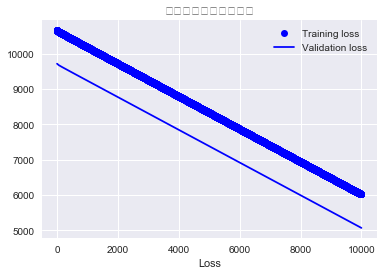

In [279]:
#繪圖

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+ 1)
plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('訓練與驗證的損失函數')
plt.xlabel('Epohs')
plt.xlabel('Loss')
plt.legend()
plt.show()

In [ ]:
#視覺化,紅色為標準答案
plt.style.use('seaborn')
test_targets_array=test_targets.values
plt.figure(figsize=(15, 6)) 
xt = test_data[:]
plt.plot(test_targets_array, 'rd', label='test_targets_array')
plt.plot(Vote.predict(xt), 'gd', label='model_xgb')
# plt.plot(model_AdaBoostRegressor.predict(xt), '#00008B', label='model_AdaBoostRegressor')
# plt.plot(Vote.predict(xt), 'bd', label='Vote')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with test_targets')
plt.show()

In [340]:
#PCA
"""
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
x = X_scaler.fit_transform(fdsd.iloc[:,1:Significant_factor.shape[1]])
# PCA
pca = PCA(n_components=0.9)# 保證降維後的資料保持90%的資訊
pca.fit(x)
asas = pca.transform(x)